In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = True

apply_scaffold_split = True

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_regression_random_gnn/model_gnn_conv"
    else:
        filename_basic = "results_regression_random_fp/model_fp"
else:
    if not use_fingerprints:
        filename_basic = "results_regression_scaffold_gnn/model_gnn_conv"
    else:
        filename_basic = "results_regression_scaffold_fp/model_fp"

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [6]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512], [512, 256]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:
batch_size = 64

In [10]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [1, 2, 3, 4]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [11]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [12]:
print(len(combinations))

64


run: 0
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258353E2FD0>, <dgl.data.utils.Subset object at 0x0000025856D98640>, <dgl.data.utils.Subset object at 0x0000025856D988B0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.050856550534566 | Validation Loss 2.124421000480652
Epoch 10 | Train Loss 0.1357299362619718 | Validation Loss 1.3750016689300537
Epoch 20 | Train Loss 0.07144223401943843 | Validation Loss 1.4402571320533752
Epoch 30 | Train Loss 0.053827757388353346 | Validation Loss 1.2855525016784668
Epoch 40 | Train Loss 0.035836139445503554 | Validation Loss 1.2711127996444702
Epoch 50 | Train Loss 0.03737122379243374 | Validation Loss 1.4116029739379883


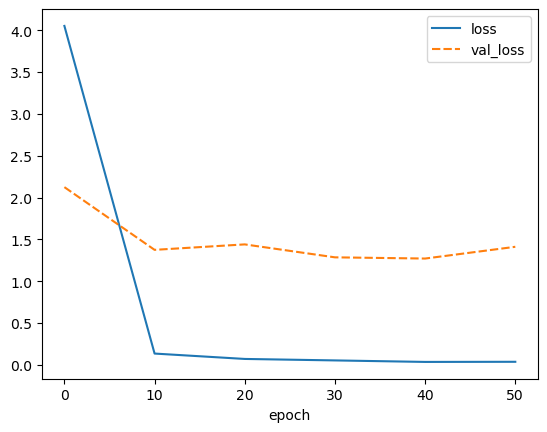

best weights loaded


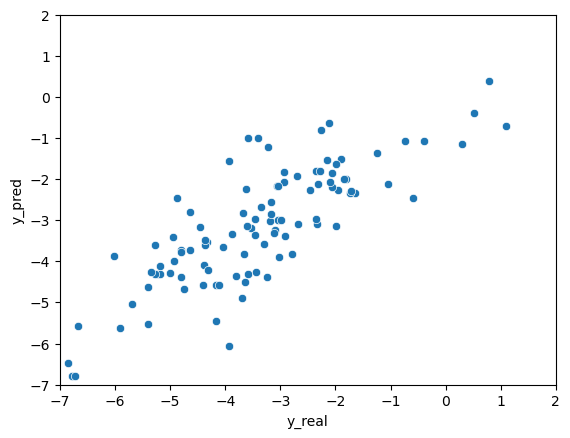

elapsed time: 8.824910640716553
run: 1
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856769940>, <dgl.data.utils.Subset object at 0x00000258D8A39EB0>, <dgl.data.utils.Subset object at 0x00000258D8A39A30>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.47471497853597 | Validation Loss 5.509774208068848
Epoch 10 | Train Loss 0.6524385213851929 | Validation Loss 3.0228923559188843
Epoch 20 | Train Loss 0.35780008683602016 | Validation Loss 2.8516595363616943
Epoch 30 | Train Loss 0.3233939881126086 | Validation Loss 2.7360135316848755
Epoch 40 | Train Loss 0.28020332207282383 | Validation Loss 2.7817296981811523
Epoch 50 | Train Loss 0.2504706374059121 | Validation Loss 2.4857966899871826
Epoch 60 | Train Loss 0.24243430197238922 | Validation Loss 2.4775795936584473
Epoch 70 | Train Loss 0.2182035921451946 | Validation Loss 2.5587539672851562
Epoch 80 | Train Loss 0.221230527634422 | Validation Loss 2.6981111764907837
Epoch 90 | Train Loss 0.24312424237529437 | Validation Loss 2.5161107182502747
Epoch 100 | Train Loss 0.20158982227245967 | Validation Loss 2.53274929523468
Epoch 110 | Train Loss 0.21912854214509328 | Validation Loss 2.6070817708969116
Epoch 120 | Train Loss 0.3186353127161662 | Validation Loss 2.5

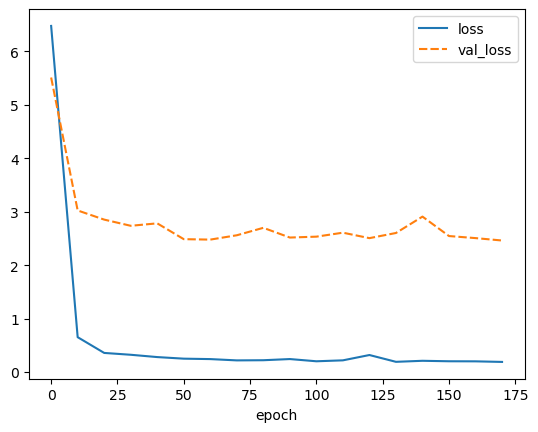

best weights loaded


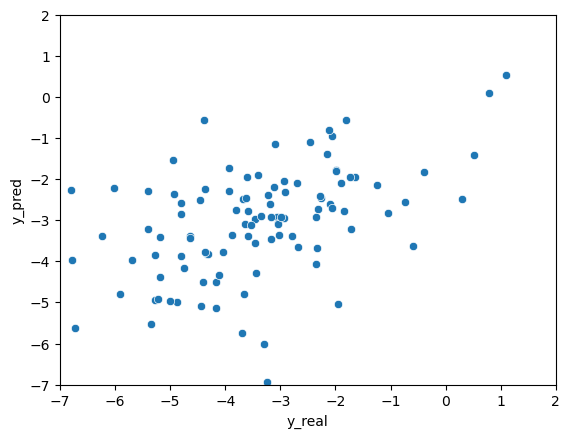

elapsed time: 10.69330644607544
run: 2
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258567BF160>, <dgl.data.utils.Subset object at 0x00000258D8A2DDC0>, <dgl.data.utils.Subset object at 0x00000258D8A32370>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.258142916361491 | Validation Loss 1.1610121130943298
Epoch 10 | Train Loss 0.1664150747160117 | Validation Loss 1.382789671421051
Epoch 20 | Train Loss 0.0895958482598265 | Validation Loss 1.4656547904014587
Epoch 30 | Train Loss 0.06993393947680791 | Validation Loss 1.4434282779693604
Epoch 40 | Train Loss 0.02689026662458976 | Validation Loss 1.3871471881866455
Epoch 50 | Train Loss 0.057921956727902096 | Validation Loss 1.2940261363983154


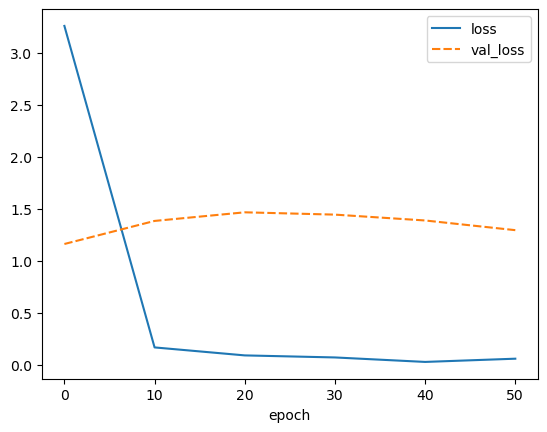

best weights loaded


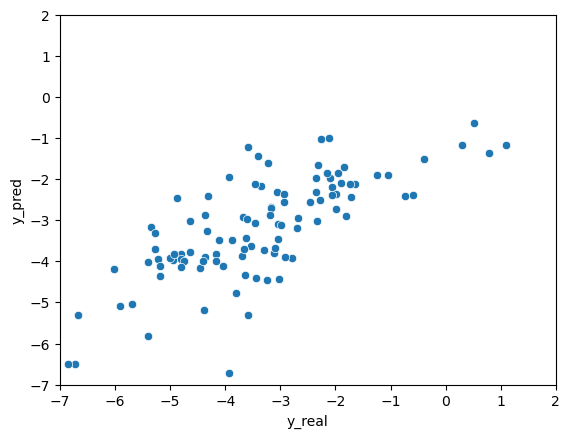

elapsed time: 5.702757358551025
run: 3
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258568EA0D0>, <dgl.data.utils.Subset object at 0x00000258DB2D6D00>, <dgl.data.utils.Subset object at 0x00000258DB2D6DC0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.536931419372559 | Validation Loss 3.345171809196472
Epoch 10 | Train Loss 0.4624492992957433 | Validation Loss 2.810579538345337
Epoch 20 | Train Loss 0.30334256490071615 | Validation Loss 2.219889521598816
Epoch 30 | Train Loss 0.26594341583549974 | Validation Loss 2.5264941453933716
Epoch 40 | Train Loss 0.29491375933090846 | Validation Loss 2.918768882751465
Epoch 50 | Train Loss 0.2577300691356262 | Validation Loss 2.3610494136810303
Epoch 60 | Train Loss 0.25597531696160636 | Validation Loss 2.2453938126564026
Epoch 70 | Train Loss 0.2363303034255902 | Validation Loss 2.701758861541748
Epoch 80 | Train Loss 0.2992510331173738 | Validation Loss 2.9257972240448
Epoch 90 | Train Loss 0.2267913457006216 | Validation Loss 2.833900213241577
Epoch 100 | Train Loss 0.22031549165646236 | Validation Loss 2.353141188621521
Epoch 110 | Train Loss 0.36168062140544255 | Validation Loss 3.227212429046631
Epoch 120 | Train Loss 0.21000675857067108 | Validation Loss 2.475214

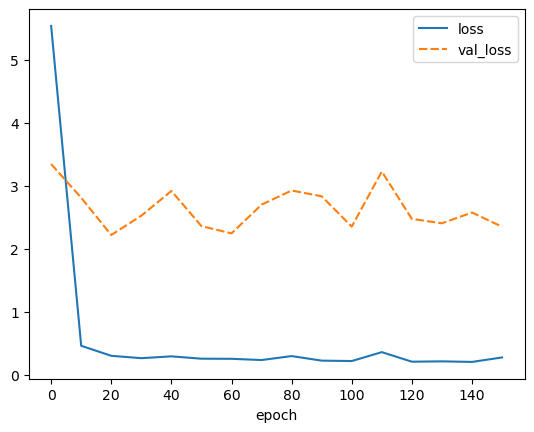

best weights loaded


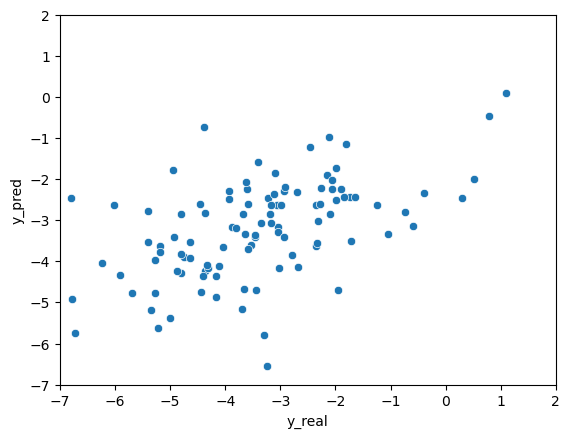

elapsed time: 14.088936567306519
run: 4
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258569D9FD0>, <dgl.data.utils.Subset object at 0x00000258D899A6A0>, <dgl.data.utils.Subset object at 0x00000258D899AC10>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.343559738000234 | Validation Loss 2.5459139347076416
Epoch 10 | Train Loss 0.17327178965012233 | Validation Loss 1.3384701609611511
Epoch 20 | Train Loss 0.06406224220991134 | Validation Loss 1.3863074779510498
Epoch 30 | Train Loss 0.054123262564341225 | Validation Loss 1.4227802157402039
Epoch 40 | Train Loss 0.045232077687978746 | Validation Loss 1.4401071071624756
Epoch 50 | Train Loss 0.10448935106396676 | Validation Loss 1.3497269749641418


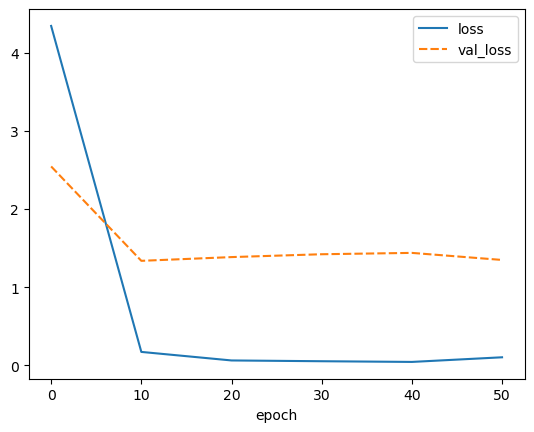

best weights loaded


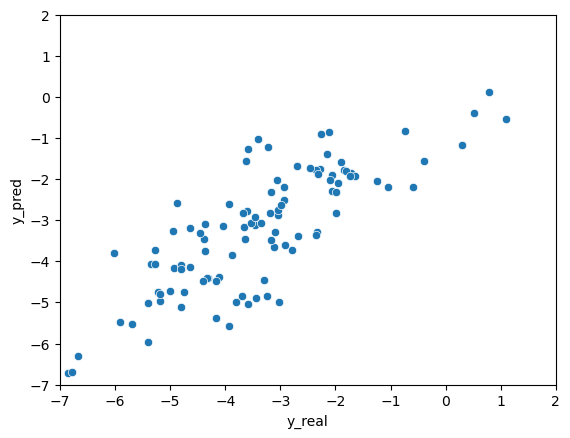

elapsed time: 4.563686370849609
run: 5
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856A5CB80>, <dgl.data.utils.Subset object at 0x00000258DB364AF0>, <dgl.data.utils.Subset object at 0x00000258DB3701C0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.033300487200419 | Validation Loss 4.448436737060547
Epoch 10 | Train Loss 0.48748771150906883 | Validation Loss 2.6110334992408752
Epoch 20 | Train Loss 0.3124159753322601 | Validation Loss 3.2122915983200073
Epoch 30 | Train Loss 0.2587465194364389 | Validation Loss 2.566920042037964
Epoch 40 | Train Loss 0.26978009740511577 | Validation Loss 2.6695234775543213
Epoch 50 | Train Loss 0.23413850416739782 | Validation Loss 2.6807373762130737
Epoch 60 | Train Loss 0.2850718927880128 | Validation Loss 2.955143451690674
Epoch 70 | Train Loss 0.27318418423334756 | Validation Loss 2.7112174034118652
Epoch 80 | Train Loss 0.4512191260854403 | Validation Loss 2.846773862838745


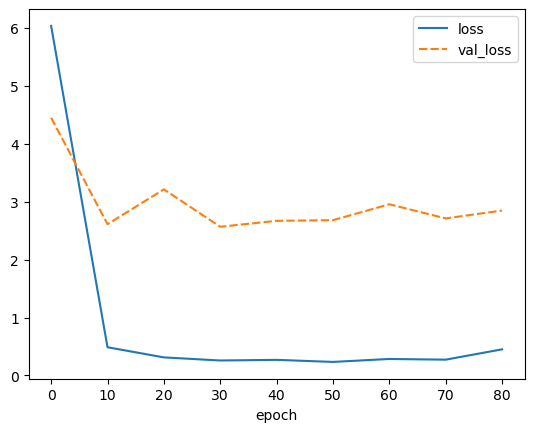

best weights loaded


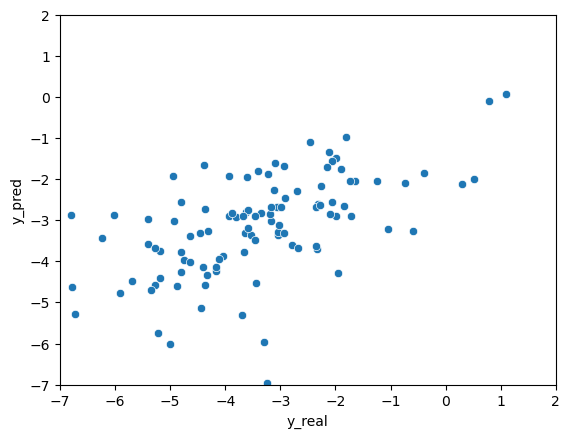

elapsed time: 6.555711269378662
run: 6
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258568F53D0>, <dgl.data.utils.Subset object at 0x00000258E1463190>, <dgl.data.utils.Subset object at 0x00000258E1469070>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.356756075223287 | Validation Loss 3.7821853160858154
Epoch 10 | Train Loss 0.1939560373624166 | Validation Loss 1.5458326935768127
Epoch 20 | Train Loss 0.0920046125849088 | Validation Loss 1.4727078676223755
Epoch 30 | Train Loss 0.0529743326207002 | Validation Loss 1.4392703771591187
Epoch 40 | Train Loss 0.044920183594028155 | Validation Loss 1.397541880607605
Epoch 50 | Train Loss 0.028752924439807735 | Validation Loss 1.393182098865509


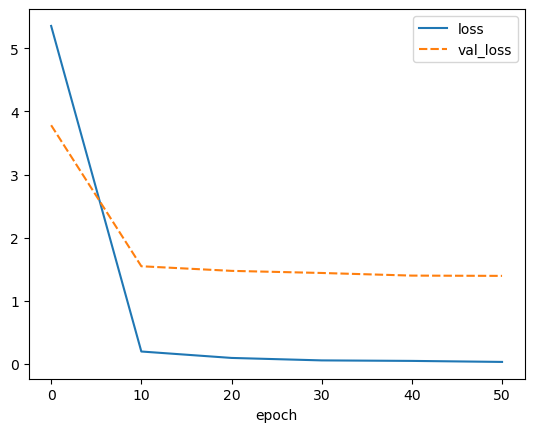

best weights loaded


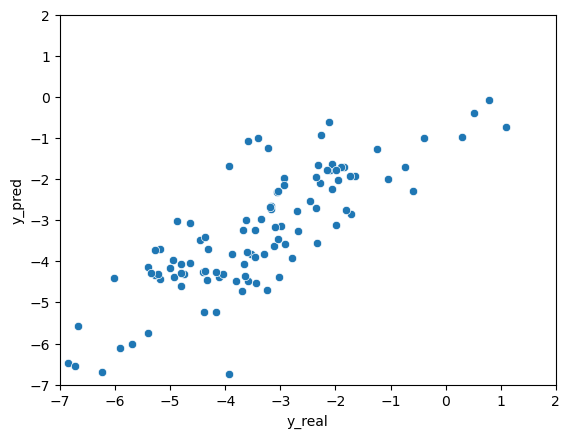

elapsed time: 3.7801311016082764
run: 7
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025834F06400>, <dgl.data.utils.Subset object at 0x00000258DB3221C0>, <dgl.data.utils.Subset object at 0x00000258DB32A5B0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 7.615265925725301 | Validation Loss 5.475970268249512
Epoch 10 | Train Loss 0.6985597888628642 | Validation Loss 3.314783215522766
Epoch 20 | Train Loss 0.4057631611824036 | Validation Loss 3.3789429664611816
Epoch 30 | Train Loss 0.3268347228566805 | Validation Loss 2.868744134902954
Epoch 40 | Train Loss 0.3029092952609062 | Validation Loss 2.8507519960403442
Epoch 50 | Train Loss 0.33083597421646116 | Validation Loss 2.8248109817504883
Epoch 60 | Train Loss 0.24706564942995707 | Validation Loss 2.813081741333008
Epoch 70 | Train Loss 0.25719273164868356 | Validation Loss 2.8346720933914185
Epoch 80 | Train Loss 0.23346829290191332 | Validation Loss 2.624679684638977
Epoch 90 | Train Loss 0.253569678713878 | Validation Loss 2.8196141719818115
Epoch 100 | Train Loss 0.2121685903519392 | Validation Loss 2.779820203781128
Epoch 110 | Train Loss 0.4519605820377668 | Validation Loss 2.7555521726608276
Epoch 120 | Train Loss 0.32099865476290385 | Validation Loss 2.6439

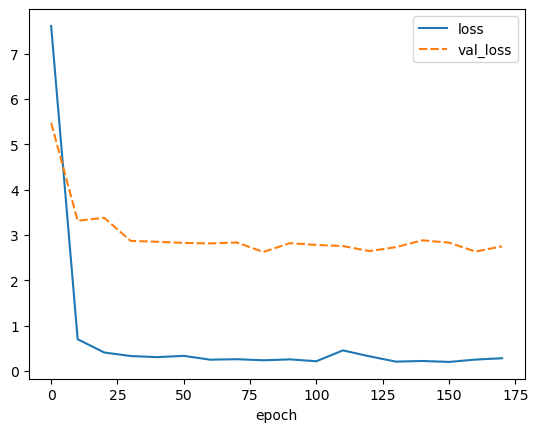

best weights loaded


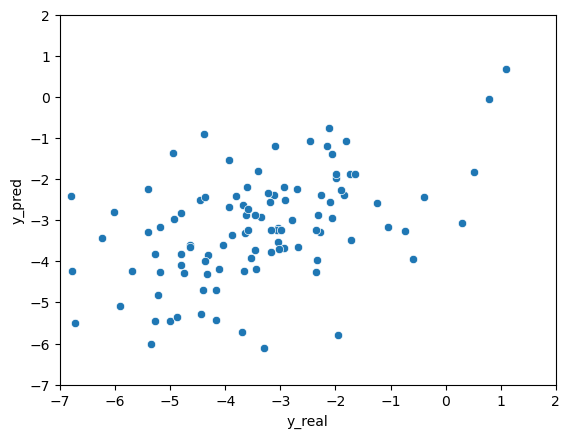

elapsed time: 11.028058767318726
run: 8
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258567E2A30>, <dgl.data.utils.Subset object at 0x00000258E13CAE50>, <dgl.data.utils.Subset object at 0x00000258E13E0AF0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.869821151097615 | Validation Loss 2.6688365936279297
Epoch 10 | Train Loss 0.17329287081956862 | Validation Loss 1.2280610799789429
Epoch 20 | Train Loss 0.0711210531493028 | Validation Loss 1.3538299202919006
Epoch 30 | Train Loss 0.053738111878434816 | Validation Loss 1.3730443120002747
Epoch 40 | Train Loss 0.06083315669869383 | Validation Loss 1.382179319858551
Epoch 50 | Train Loss 0.029910825286060573 | Validation Loss 1.3699342608451843


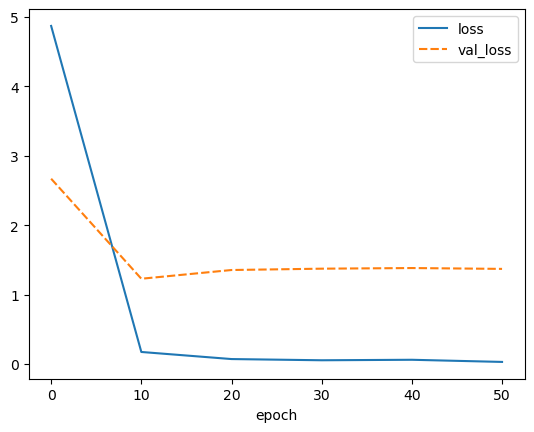

best weights loaded


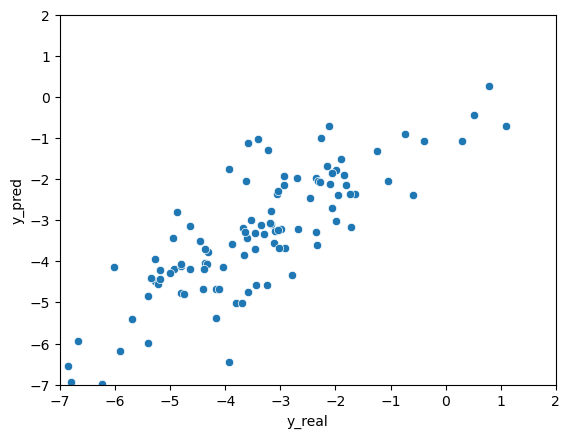

elapsed time: 6.768104553222656
run: 9
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856B73340>, <dgl.data.utils.Subset object at 0x00000258DB29AFA0>, <dgl.data.utils.Subset object at 0x00000258DB29AB80>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.590355809529623 | Validation Loss 5.328203916549683
Epoch 10 | Train Loss 0.5654654920101165 | Validation Loss 3.112452268600464
Epoch 20 | Train Loss 0.3713478704293569 | Validation Loss 3.0405633449554443
Epoch 30 | Train Loss 0.3173493415117264 | Validation Loss 2.748051643371582
Epoch 40 | Train Loss 0.2687732733786106 | Validation Loss 2.7902849912643433
Epoch 50 | Train Loss 0.26456283368170264 | Validation Loss 2.7862566709518433
Epoch 60 | Train Loss 0.23679714451233547 | Validation Loss 2.7342480421066284
Epoch 70 | Train Loss 0.2598695022364457 | Validation Loss 2.831918716430664
Epoch 80 | Train Loss 0.21793242034812768 | Validation Loss 2.5819549560546875
Epoch 90 | Train Loss 0.21396833459536235 | Validation Loss 2.7093253135681152
Epoch 100 | Train Loss 0.24349869700769583 | Validation Loss 2.8092082738876343
Epoch 110 | Train Loss 0.2065823088089625 | Validation Loss 2.763843059539795
Epoch 120 | Train Loss 0.20554322376847267 | Validation Loss 2.3

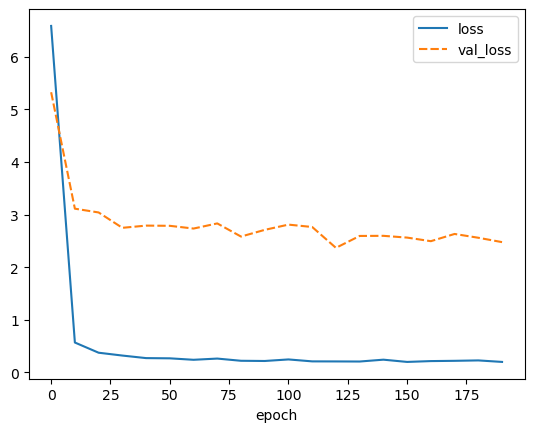

best weights loaded


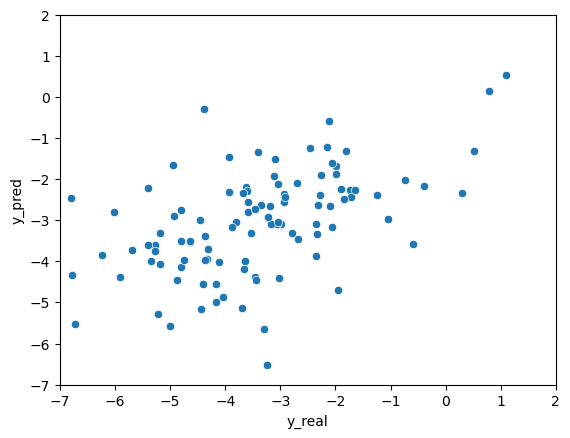

elapsed time: 16.648772478103638
run: 10
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856915820>, <dgl.data.utils.Subset object at 0x00000258D87BABE0>, <dgl.data.utils.Subset object at 0x00000258D87E2520>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.5910701553026834 | Validation Loss 1.633510172367096
Epoch 10 | Train Loss 0.17140442033608755 | Validation Loss 1.6014078259468079
Epoch 20 | Train Loss 0.07676137189070384 | Validation Loss 1.3234259486198425
Epoch 30 | Train Loss 0.2426560233036677 | Validation Loss 1.225829005241394
Epoch 40 | Train Loss 0.07211540068189302 | Validation Loss 1.3286603093147278
Epoch 50 | Train Loss 0.026884383894503115 | Validation Loss 1.2529706358909607


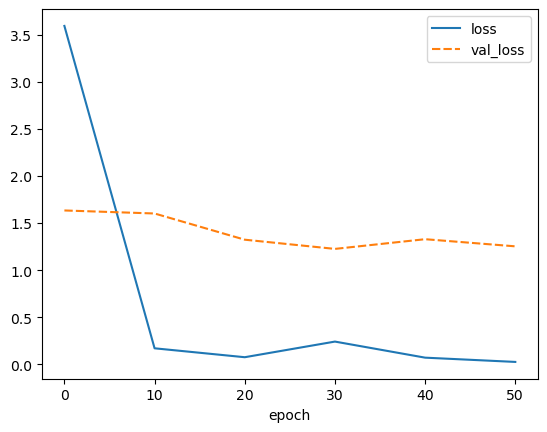

best weights loaded


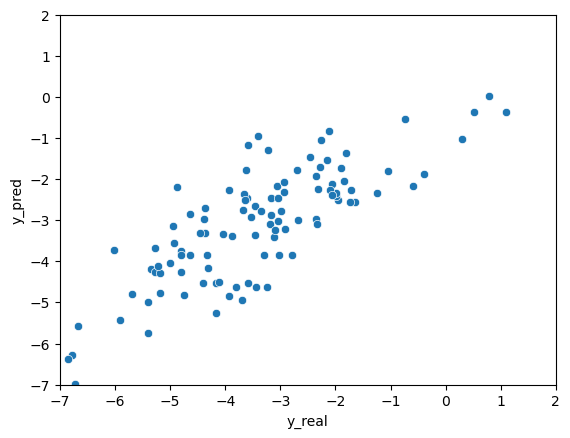

elapsed time: 7.03437614440918
run: 11
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258D87DCA30>, <dgl.data.utils.Subset object at 0x00000258DB2BF5E0>, <dgl.data.utils.Subset object at 0x00000258DB2BFDF0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.115136925379435 | Validation Loss 2.7753177881240845
Epoch 10 | Train Loss 0.4749319980541865 | Validation Loss 2.7469676733016968
Epoch 20 | Train Loss 0.28088817596435545 | Validation Loss 2.7809072732925415
Epoch 30 | Train Loss 0.4322964568932851 | Validation Loss 2.3082417249679565
Epoch 40 | Train Loss 0.37893547614415485 | Validation Loss 2.870638847351074
Epoch 50 | Train Loss 0.23249859511852264 | Validation Loss 2.844380736351013
Epoch 60 | Train Loss 0.2682020224630833 | Validation Loss 2.994303345680237
Epoch 70 | Train Loss 0.30777940874298415 | Validation Loss 2.8183900117874146


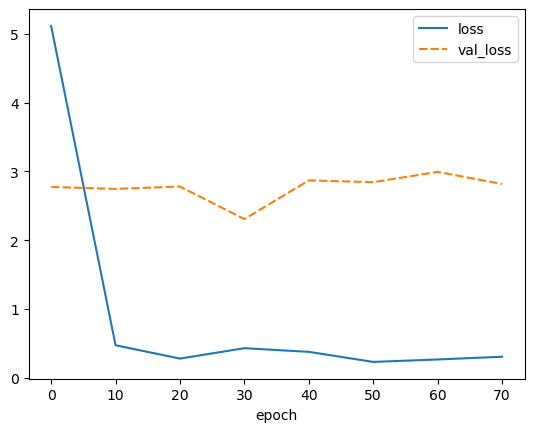

best weights loaded


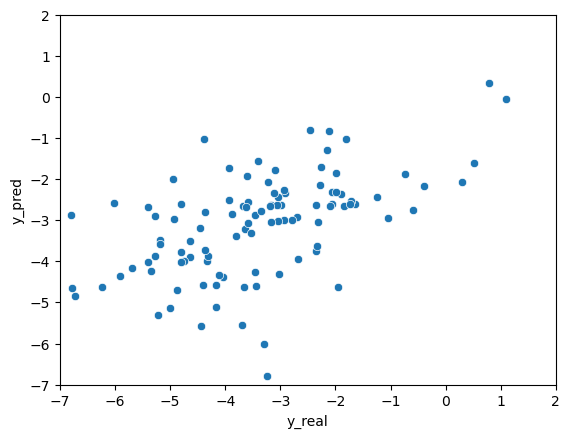

elapsed time: 9.497028589248657
run: 12
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258353E2820>, <dgl.data.utils.Subset object at 0x00000258DB2DDBB0>, <dgl.data.utils.Subset object at 0x00000258DB2B21F0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.629168430964152 | Validation Loss 2.915349841117859
Epoch 10 | Train Loss 0.13359142243862152 | Validation Loss 1.4307710528373718
Epoch 20 | Train Loss 0.10660254806280137 | Validation Loss 1.2820786237716675
Epoch 30 | Train Loss 0.0860098438958327 | Validation Loss 1.3814536333084106
Epoch 40 | Train Loss 0.046624637519319855 | Validation Loss 1.408031404018402
Epoch 50 | Train Loss 0.024067796285574636 | Validation Loss 1.3258417248725891


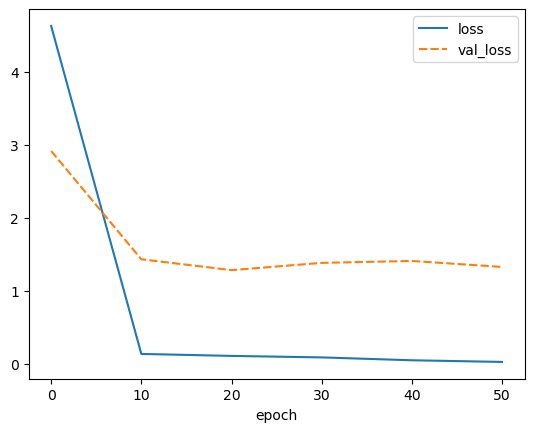

best weights loaded


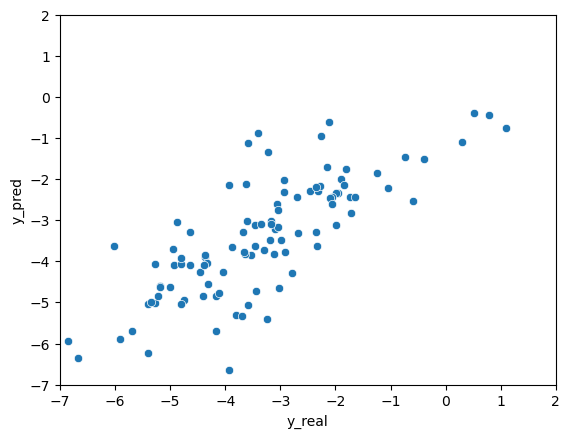

elapsed time: 4.746767997741699
run: 13
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002580F520370>, <dgl.data.utils.Subset object at 0x00000258567FF4F0>, <dgl.data.utils.Subset object at 0x00000258567FFAF0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.069234776496887 | Validation Loss 3.9030065536499023
Epoch 10 | Train Loss 0.45384547909100853 | Validation Loss 3.23461651802063
Epoch 20 | Train Loss 0.3127081503470739 | Validation Loss 2.721695899963379
Epoch 30 | Train Loss 0.2997954602042834 | Validation Loss 2.6342958211898804
Epoch 40 | Train Loss 0.23880020181337994 | Validation Loss 2.7804681062698364
Epoch 50 | Train Loss 0.22502049952745437 | Validation Loss 2.673394203186035
Epoch 60 | Train Loss 0.26129988400886456 | Validation Loss 2.7496931552886963
Epoch 70 | Train Loss 0.6315653642018636 | Validation Loss 3.4133689403533936
Epoch 80 | Train Loss 0.20604767948389052 | Validation Loss 2.673931360244751
Epoch 90 | Train Loss 0.2232288564244906 | Validation Loss 2.829157590866089
Epoch 100 | Train Loss 0.19753908508767684 | Validation Loss 2.886141300201416
Epoch 110 | Train Loss 0.20622940777490537 | Validation Loss 2.765754461288452
Epoch 120 | Train Loss 0.20037074660261472 | Validation Loss 3.09

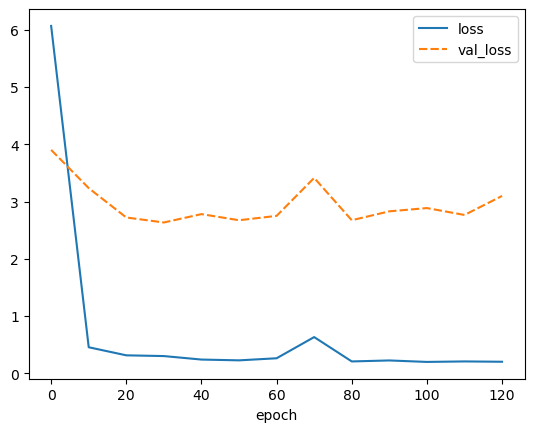

best weights loaded


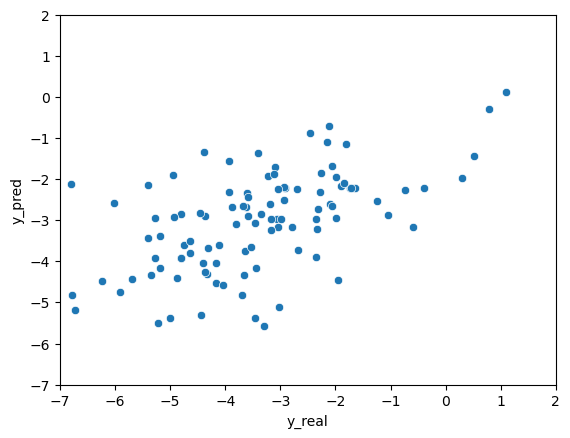

elapsed time: 9.672325372695923
run: 14
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002584E507670>, <dgl.data.utils.Subset object at 0x0000025856B0C1F0>, <dgl.data.utils.Subset object at 0x0000025856D74220>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.874340764681498 | Validation Loss 3.2218096256256104
Epoch 10 | Train Loss 0.2025303880373637 | Validation Loss 1.3060721158981323
Epoch 20 | Train Loss 0.10433986882368723 | Validation Loss 1.3136374652385712
Epoch 30 | Train Loss 0.05868588623901208 | Validation Loss 1.376749962568283
Epoch 40 | Train Loss 0.05239283032715321 | Validation Loss 1.338023841381073
Epoch 50 | Train Loss 0.02832073988392949 | Validation Loss 1.4445321559906006


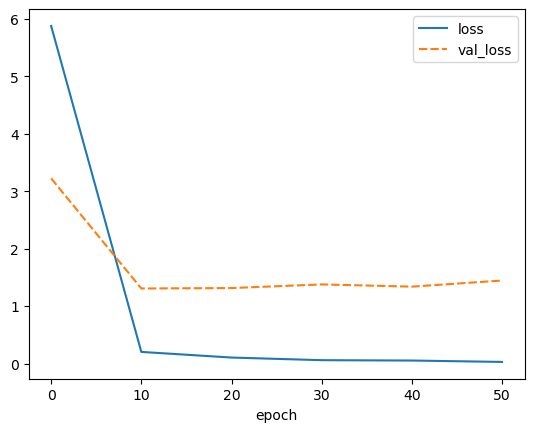

best weights loaded


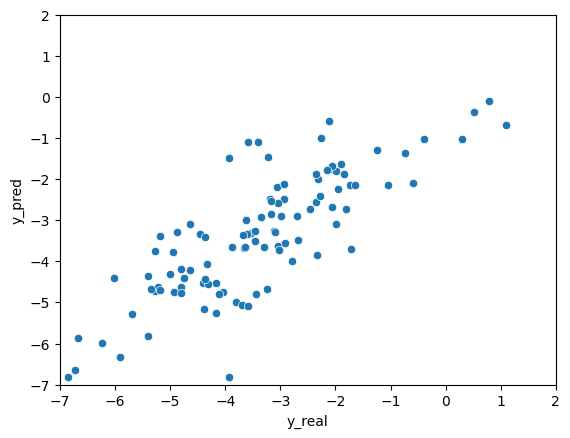

elapsed time: 4.278393268585205
run: 15
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002585494ACD0>, <dgl.data.utils.Subset object at 0x00000258DB3288E0>, <dgl.data.utils.Subset object at 0x00000258DB328310>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 7.924617195129395 | Validation Loss 5.601347923278809
Epoch 10 | Train Loss 0.6993878622849782 | Validation Loss 3.6901040077209473
Epoch 20 | Train Loss 0.40375399937232337 | Validation Loss 3.1463123559951782
Epoch 30 | Train Loss 0.36146361033121743 | Validation Loss 3.171218991279602
Epoch 40 | Train Loss 0.3080263450741768 | Validation Loss 2.7678247690200806
Epoch 50 | Train Loss 0.2872187380989393 | Validation Loss 2.9948487281799316
Epoch 60 | Train Loss 0.2610862190524737 | Validation Loss 2.770703911781311
Epoch 70 | Train Loss 0.31984161933263144 | Validation Loss 2.818676471710205
Epoch 80 | Train Loss 0.22692784344156583 | Validation Loss 2.7745707035064697
Epoch 90 | Train Loss 0.22311542679866156 | Validation Loss 2.7245287895202637
Epoch 100 | Train Loss 0.2650013839205106 | Validation Loss 2.92140394449234
Epoch 110 | Train Loss 0.2197954038778941 | Validation Loss 2.60934054851532
Epoch 120 | Train Loss 0.2878170609474182 | Validation Loss 2.72931

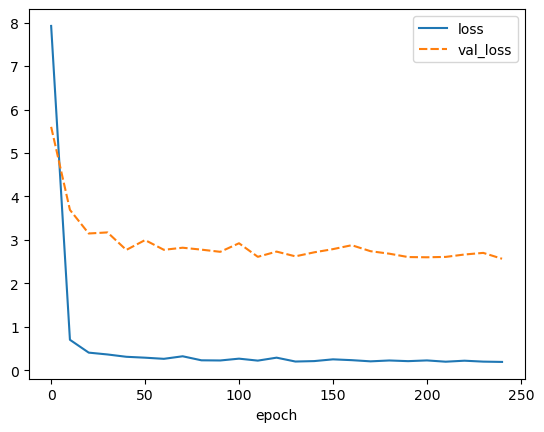

best weights loaded


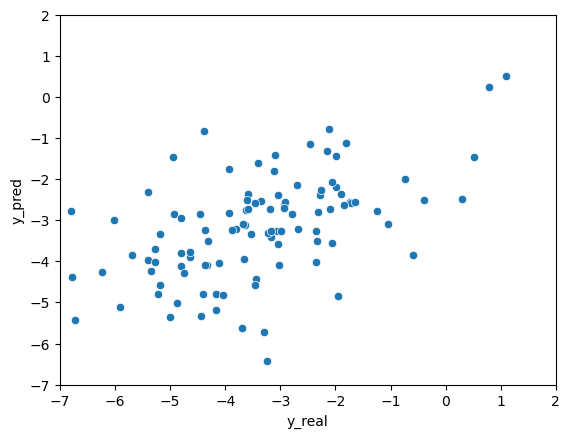

elapsed time: 14.170846223831177
run: 16
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856782550>, <dgl.data.utils.Subset object at 0x0000025856D46F40>, <dgl.data.utils.Subset object at 0x0000025856D466D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.399959373474121 | Validation Loss 1.5233935117721558
Epoch 10 | Train Loss 0.07748478303352992 | Validation Loss 1.3325762748718262
Epoch 20 | Train Loss 0.031960532814264295 | Validation Loss 1.3315887451171875
Epoch 30 | Train Loss 0.022166641925772033 | Validation Loss 1.3645392060279846
Epoch 40 | Train Loss 0.012772912889098128 | Validation Loss 1.2544540166854858
Epoch 50 | Train Loss 0.01950691326831778 | Validation Loss 1.3315791487693787


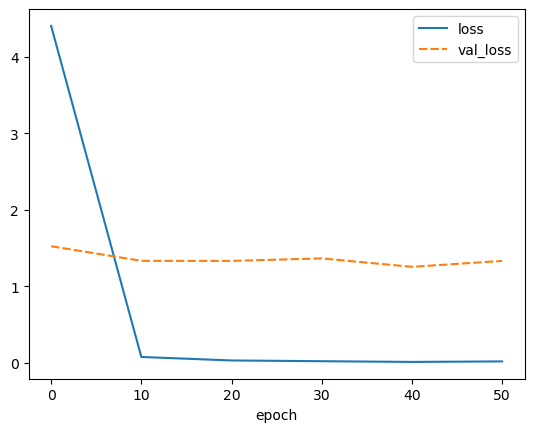

best weights loaded


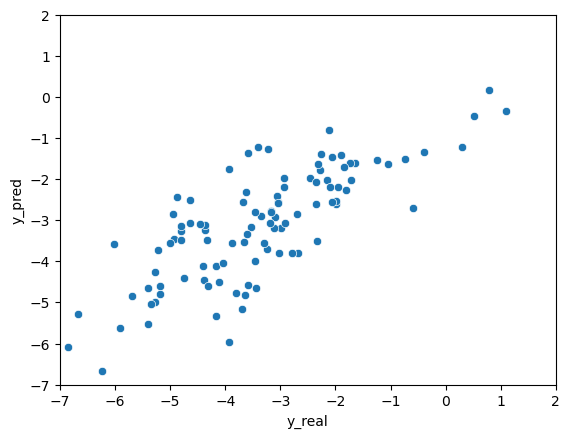

elapsed time: 4.965412378311157
run: 17
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258543F54F0>, <dgl.data.utils.Subset object at 0x000002580F470FD0>, <dgl.data.utils.Subset object at 0x000002580F447280>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.075277853012085 | Validation Loss 4.888903856277466
Epoch 10 | Train Loss 0.2516692231098811 | Validation Loss 2.9778510332107544
Epoch 20 | Train Loss 0.12213539903362593 | Validation Loss 3.2470688819885254
Epoch 30 | Train Loss 0.11500805156926314 | Validation Loss 3.275146245956421
Epoch 40 | Train Loss 0.10967653169451902 | Validation Loss 3.2745277881622314
Epoch 50 | Train Loss 0.10965482431153456 | Validation Loss 2.9895870685577393


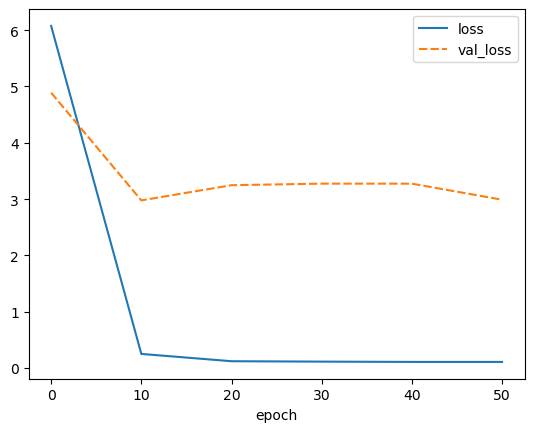

best weights loaded


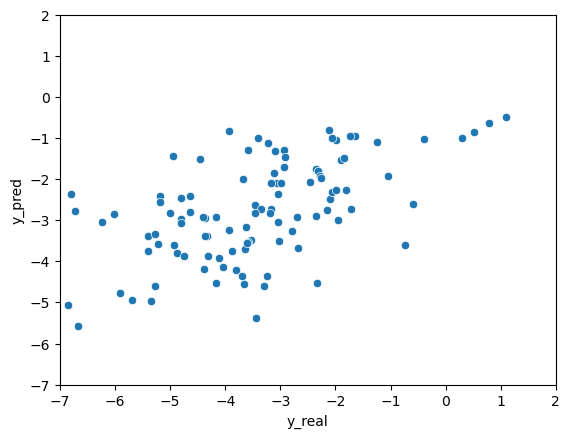

elapsed time: 4.053310871124268
run: 18
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856BB20D0>, <dgl.data.utils.Subset object at 0x0000025856BD5A90>, <dgl.data.utils.Subset object at 0x0000025856BD5A60>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.6365346908569336 | Validation Loss 1.8358818888664246
Epoch 10 | Train Loss 0.12075651983420053 | Validation Loss 1.2560725808143616
Epoch 20 | Train Loss 0.14243201067050298 | Validation Loss 1.3071720004081726
Epoch 30 | Train Loss 0.04833363828559716 | Validation Loss 1.220590591430664
Epoch 40 | Train Loss 0.00932918426891168 | Validation Loss 1.3383038640022278
Epoch 50 | Train Loss 0.01322972858324647 | Validation Loss 1.380045235157013
Epoch 60 | Train Loss 0.019186888759334882 | Validation Loss 1.338329553604126
Epoch 70 | Train Loss 0.011560149521877368 | Validation Loss 1.288480520248413
Epoch 80 | Train Loss 0.05951998581488927 | Validation Loss 1.281726062297821


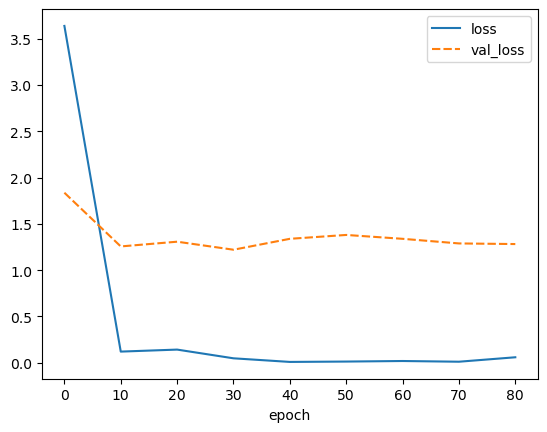

best weights loaded


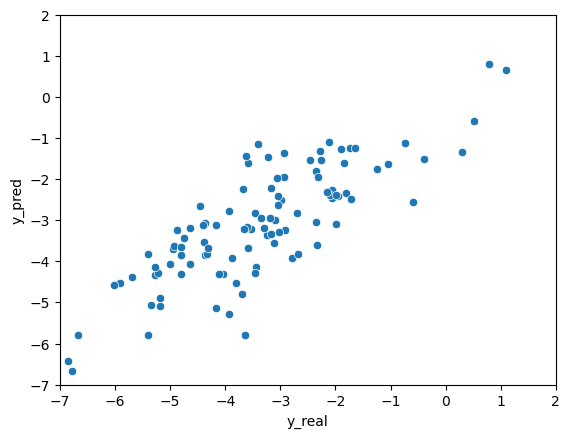

elapsed time: 7.297763109207153
run: 19
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856AAE1C0>, <dgl.data.utils.Subset object at 0x00000258DB3901C0>, <dgl.data.utils.Subset object at 0x00000258DB390B20>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.003138891855875 | Validation Loss 3.0973961353302
Epoch 10 | Train Loss 0.2654174193739891 | Validation Loss 3.3610068559646606
Epoch 20 | Train Loss 0.1253539907435576 | Validation Loss 3.49195659160614
Epoch 30 | Train Loss 0.1654387059311072 | Validation Loss 3.0207841396331787
Epoch 40 | Train Loss 0.15112644551942747 | Validation Loss 3.218174695968628
Epoch 50 | Train Loss 0.1267451025545597 | Validation Loss 2.9962247610092163


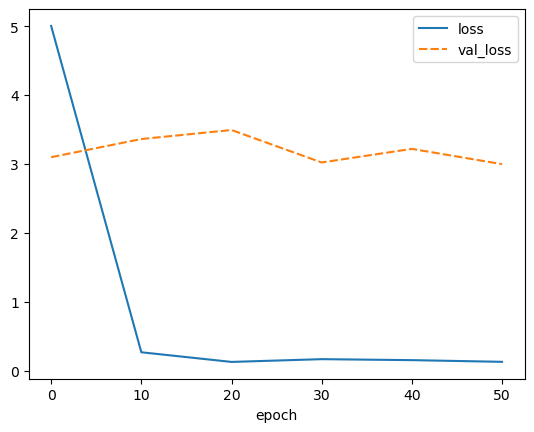

best weights loaded


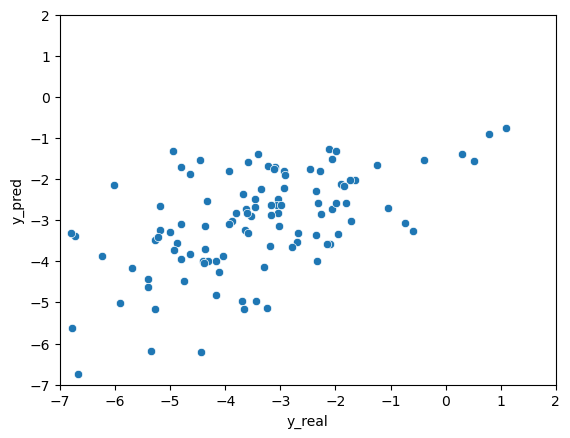

elapsed time: 4.844631671905518
run: 20
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002580F5AE640>, <dgl.data.utils.Subset object at 0x00000258E6CD40A0>, <dgl.data.utils.Subset object at 0x00000258E6CE3370>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.710779627164205 | Validation Loss 2.6143380403518677
Epoch 10 | Train Loss 0.08645317281285922 | Validation Loss 1.3650242686271667
Epoch 20 | Train Loss 0.07698341036836306 | Validation Loss 1.3436716198921204
Epoch 30 | Train Loss 0.03199678342789412 | Validation Loss 1.455909788608551
Epoch 40 | Train Loss 0.02373951254412532 | Validation Loss 1.384412169456482
Epoch 50 | Train Loss 0.04045346590379874 | Validation Loss 1.378743827342987


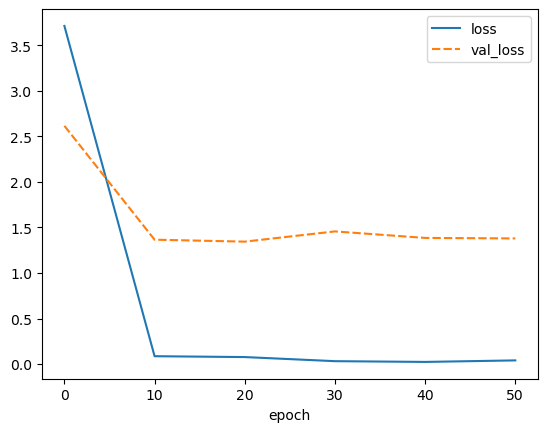

best weights loaded


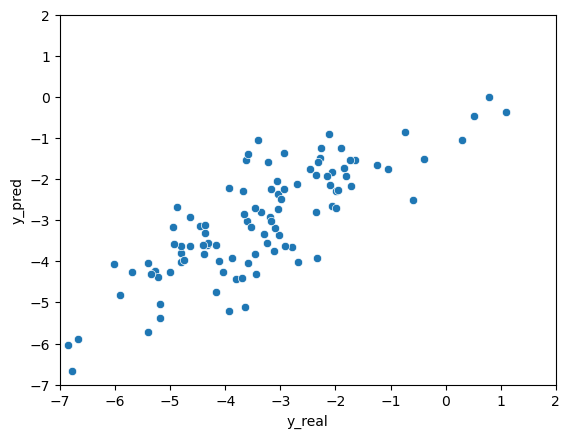

elapsed time: 4.521209478378296
run: 21
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002584DC5ADC0>, <dgl.data.utils.Subset object at 0x00000258D898EAF0>, <dgl.data.utils.Subset object at 0x00000258D898E100>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.66192094484965 | Validation Loss 4.553328514099121
Epoch 10 | Train Loss 0.21699061741431555 | Validation Loss 3.1997196674346924
Epoch 20 | Train Loss 0.13780866985519727 | Validation Loss 3.0807278156280518
Epoch 30 | Train Loss 0.14771819760402044 | Validation Loss 3.250496745109558
Epoch 40 | Train Loss 0.10933246550460657 | Validation Loss 3.0608277320861816
Epoch 50 | Train Loss 0.12494456519683202 | Validation Loss 3.1463398933410645


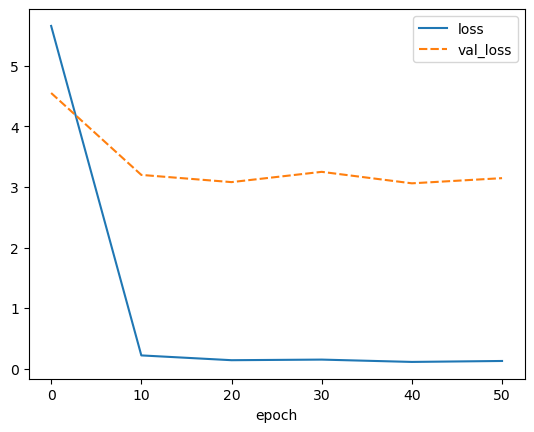

best weights loaded


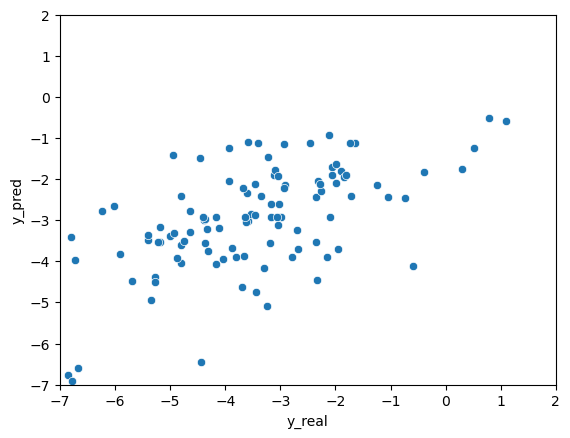

elapsed time: 5.346834182739258
run: 22
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258D8974D90>, <dgl.data.utils.Subset object at 0x00000258D89D7E80>, <dgl.data.utils.Subset object at 0x00000258D89D7A60>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.162164425849914 | Validation Loss 3.1674625873565674
Epoch 10 | Train Loss 0.10918843323985736 | Validation Loss 1.3182242512702942
Epoch 20 | Train Loss 0.05087080703427394 | Validation Loss 1.4358715415000916
Epoch 30 | Train Loss 0.020726309157907963 | Validation Loss 1.3394244313240051
Epoch 40 | Train Loss 0.04139727288857102 | Validation Loss 1.3472927808761597
Epoch 50 | Train Loss 0.018686235354592403 | Validation Loss 1.3921478986740112


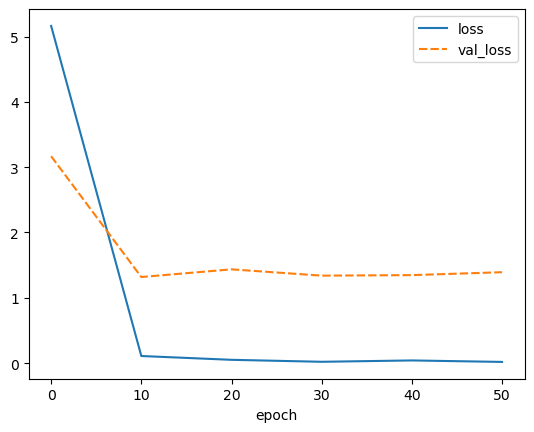

best weights loaded


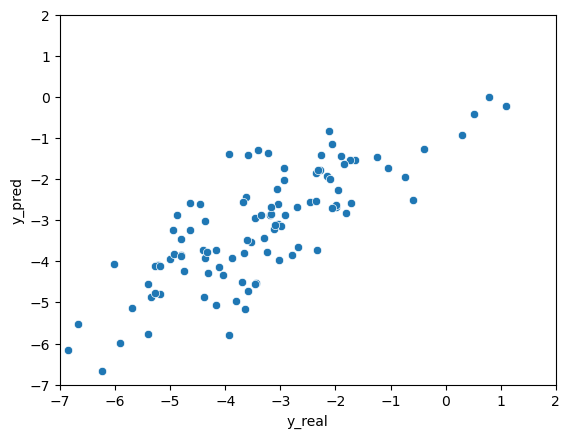

elapsed time: 3.9932122230529785
run: 23
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258D89D8820>, <dgl.data.utils.Subset object at 0x0000025856B4A4F0>, <dgl.data.utils.Subset object at 0x0000025856B4ADC0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 7.201132329305013 | Validation Loss 5.526713609695435
Epoch 10 | Train Loss 0.3973513354857763 | Validation Loss 3.1084893941879272
Epoch 20 | Train Loss 0.19922672683993975 | Validation Loss 3.5311182737350464
Epoch 30 | Train Loss 0.13933155064781508 | Validation Loss 3.2506706714630127
Epoch 40 | Train Loss 0.10179000000158946 | Validation Loss 3.2603543996810913
Epoch 50 | Train Loss 0.093392582423985 | Validation Loss 3.015774130821228


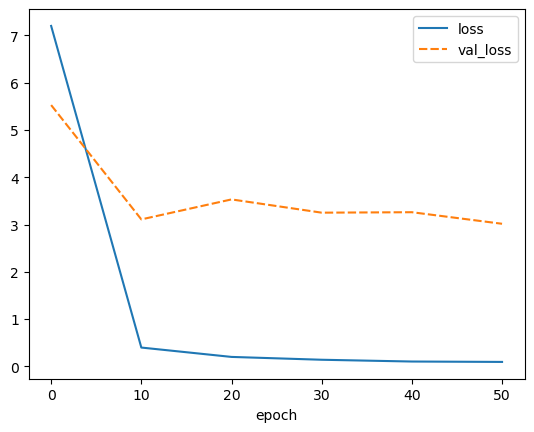

best weights loaded


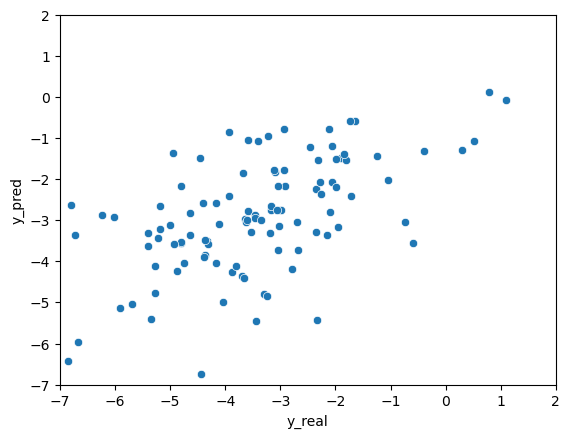

elapsed time: 4.61155366897583
run: 24
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258569AFA90>, <dgl.data.utils.Subset object at 0x00000258DB333C10>, <dgl.data.utils.Subset object at 0x00000258D89040D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.320777960618337 | Validation Loss 1.6282256245613098
Epoch 10 | Train Loss 0.0772236426671346 | Validation Loss 1.3297565579414368
Epoch 20 | Train Loss 0.04489939200381438 | Validation Loss 1.4303079843521118
Epoch 30 | Train Loss 0.025360151877005896 | Validation Loss 1.4203282594680786
Epoch 40 | Train Loss 0.02662312009682258 | Validation Loss 1.3901211619377136
Epoch 50 | Train Loss 0.02512528734902541 | Validation Loss 1.4115895628929138


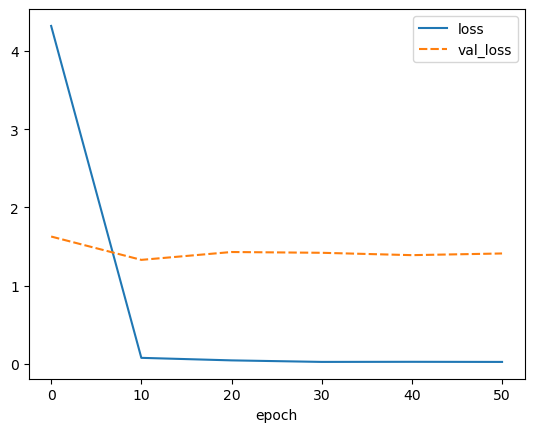

best weights loaded


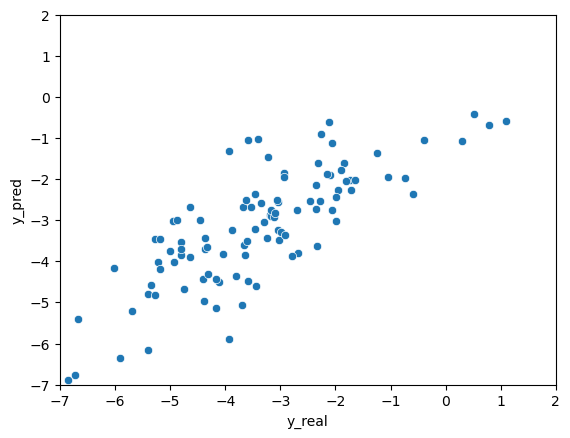

elapsed time: 4.531208038330078
run: 25
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258D894D100>, <dgl.data.utils.Subset object at 0x00000258E146B160>, <dgl.data.utils.Subset object at 0x00000258E146B4C0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.541454950968425 | Validation Loss 4.582189559936523
Epoch 10 | Train Loss 0.22166008595377207 | Validation Loss 3.46130907535553
Epoch 20 | Train Loss 0.13877353233595688 | Validation Loss 3.4469637870788574
Epoch 30 | Train Loss 0.13411910086870193 | Validation Loss 3.3220102787017822
Epoch 40 | Train Loss 0.12248336958388488 | Validation Loss 3.311729073524475
Epoch 50 | Train Loss 0.11483632177114486 | Validation Loss 3.17451012134552


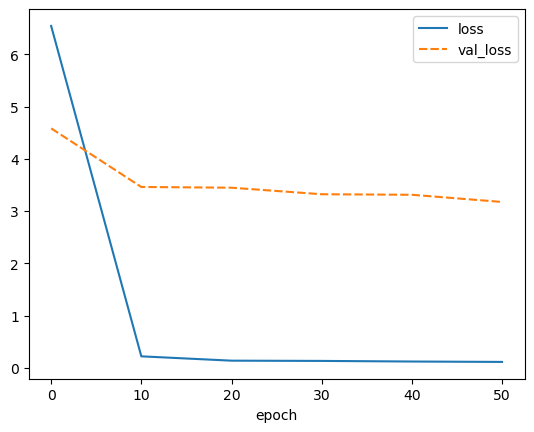

best weights loaded


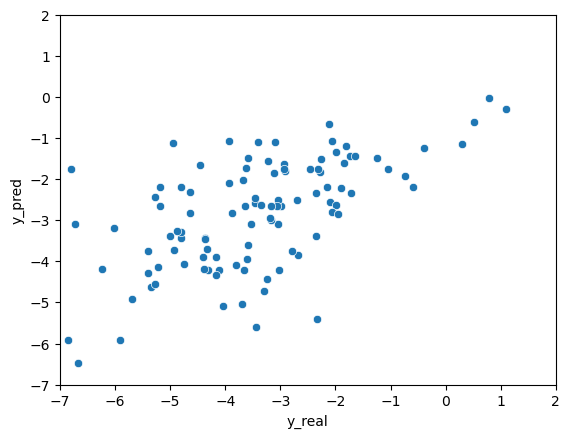

elapsed time: 4.836679458618164
run: 26
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002585686A610>, <dgl.data.utils.Subset object at 0x0000025856CDD490>, <dgl.data.utils.Subset object at 0x0000025856CEC400>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.8421715100606284 | Validation Loss 1.3107702136039734
Epoch 10 | Train Loss 0.10870682497819265 | Validation Loss 1.534998595714569
Epoch 20 | Train Loss 0.03575010492155949 | Validation Loss 1.3479265570640564
Epoch 30 | Train Loss 0.11803885102272034 | Validation Loss 1.6955033540725708
Epoch 40 | Train Loss 0.027224901442726452 | Validation Loss 1.475096046924591
Epoch 50 | Train Loss 0.06244041236738364 | Validation Loss 1.5806690454483032


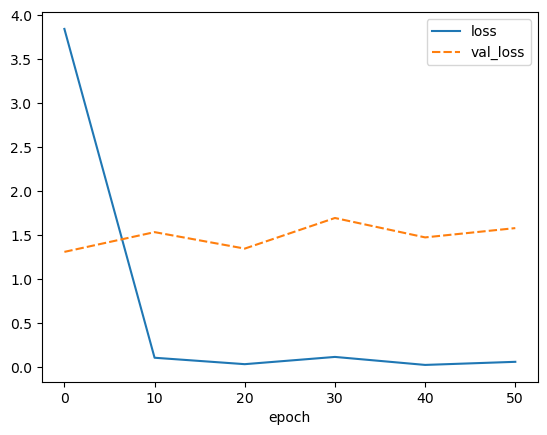

best weights loaded


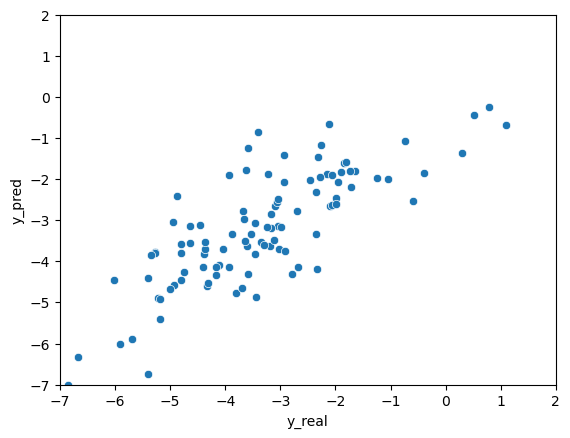

elapsed time: 5.625933647155762
run: 27
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856864BB0>, <dgl.data.utils.Subset object at 0x00000258E6D229A0>, <dgl.data.utils.Subset object at 0x00000258E6D22C10>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.209713210662206 | Validation Loss 2.84795880317688
Epoch 10 | Train Loss 0.25085438092549645 | Validation Loss 3.840105891227722
Epoch 20 | Train Loss 0.14912239114443462 | Validation Loss 2.712827682495117
Epoch 30 | Train Loss 0.16678570496539274 | Validation Loss 3.3921666145324707
Epoch 40 | Train Loss 0.16841612209876378 | Validation Loss 3.208466649055481
Epoch 50 | Train Loss 0.1079824835062027 | Validation Loss 3.508055329322815
Epoch 60 | Train Loss 0.13238037452101709 | Validation Loss 3.4004045724868774
Epoch 70 | Train Loss 0.1177833404392004 | Validation Loss 3.1244850158691406
Epoch 80 | Train Loss 0.16445330306887626 | Validation Loss 3.8244335651397705
Epoch 90 | Train Loss 0.11764035522937774 | Validation Loss 3.0035229921340942
Epoch 100 | Train Loss 0.10457453019917011 | Validation Loss 3.1500145196914673


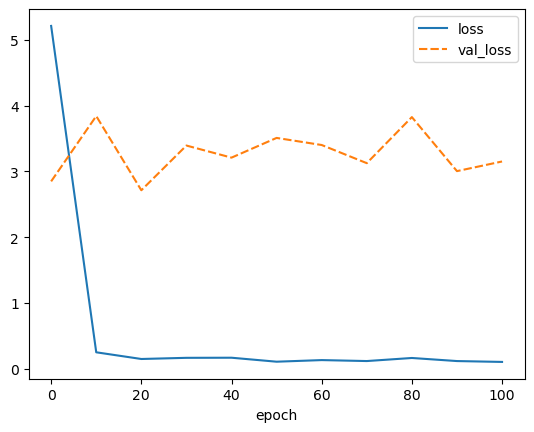

best weights loaded


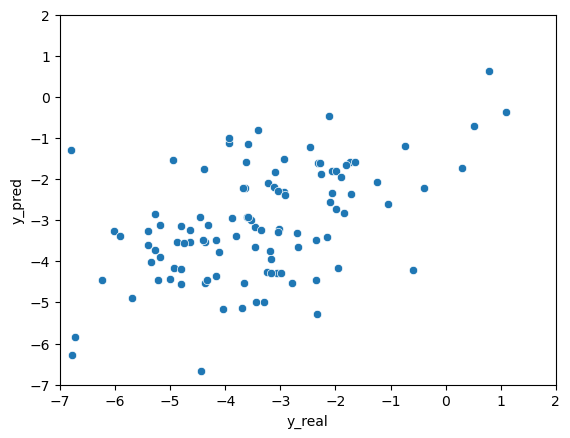

elapsed time: 9.977100849151611
run: 28
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856968520>, <dgl.data.utils.Subset object at 0x000002580F52CCD0>, <dgl.data.utils.Subset object at 0x000002580F52CB80>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.043235095342 | Validation Loss 2.7130261659622192
Epoch 10 | Train Loss 0.10813788125912348 | Validation Loss 1.7646079063415527
Epoch 20 | Train Loss 0.0843911218146483 | Validation Loss 1.436681091785431
Epoch 30 | Train Loss 0.04808344890673955 | Validation Loss 1.3225539922714233
Epoch 40 | Train Loss 0.030754550267010926 | Validation Loss 1.3708797097206116
Epoch 50 | Train Loss 0.027945117171232898 | Validation Loss 1.3546903729438782


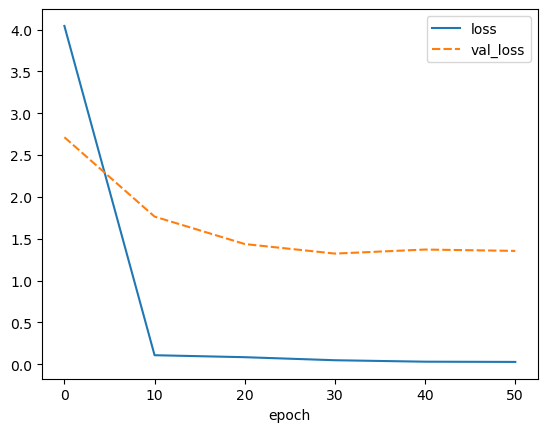

best weights loaded


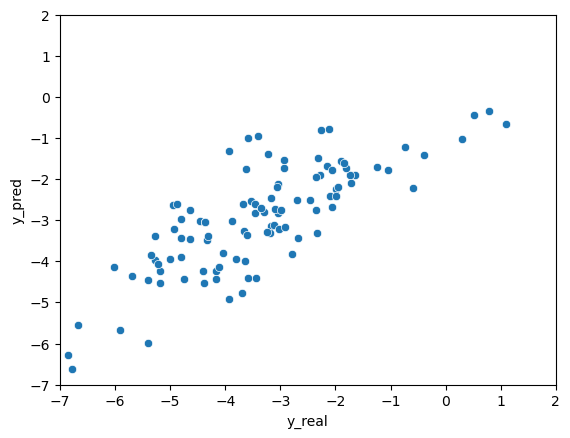

elapsed time: 4.36760139465332
run: 29
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002580F5792E0>, <dgl.data.utils.Subset object at 0x00000258E13CC100>, <dgl.data.utils.Subset object at 0x00000258E14199D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.55810116926829 | Validation Loss 4.159969329833984
Epoch 10 | Train Loss 0.21439213156700135 | Validation Loss 3.0273061990737915
Epoch 20 | Train Loss 0.13172057333091894 | Validation Loss 3.087910771369934
Epoch 30 | Train Loss 0.19631953313946723 | Validation Loss 2.6367026567459106
Epoch 40 | Train Loss 0.11315351352095604 | Validation Loss 3.15861177444458
Epoch 50 | Train Loss 0.10472342030455668 | Validation Loss 2.9665162563323975
Epoch 60 | Train Loss 0.14237100780010223 | Validation Loss 2.7574563026428223
Epoch 70 | Train Loss 0.11770575614646077 | Validation Loss 3.071687936782837
Epoch 80 | Train Loss 0.13449184820055962 | Validation Loss 3.3330135345458984


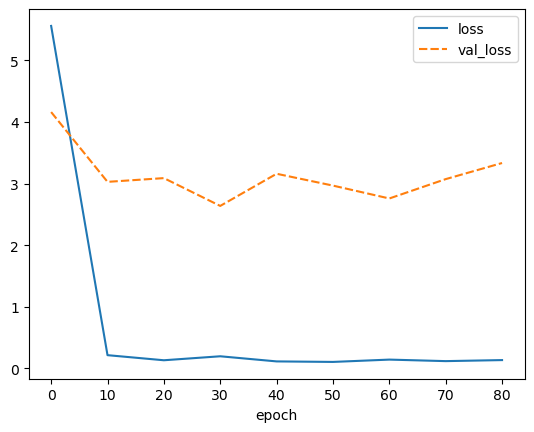

best weights loaded


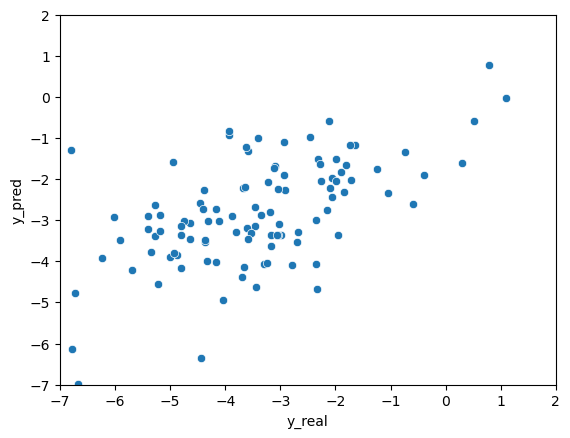

elapsed time: 5.900323152542114
run: 30
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258E13F2490>, <dgl.data.utils.Subset object at 0x000002580D160D60>, <dgl.data.utils.Subset object at 0x000002580D1603D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.194901577631632 | Validation Loss 3.264884114265442
Epoch 10 | Train Loss 0.09662052541971207 | Validation Loss 1.3864527344703674
Epoch 20 | Train Loss 0.03571854370335738 | Validation Loss 1.397922158241272
Epoch 30 | Train Loss 0.019115546159446238 | Validation Loss 1.489743411540985
Epoch 40 | Train Loss 0.01605653651058674 | Validation Loss 1.4261647462844849
Epoch 50 | Train Loss 0.05127242170274258 | Validation Loss 1.4121018648147583


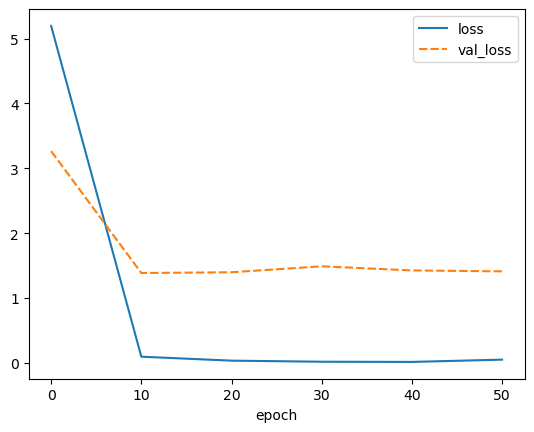

best weights loaded


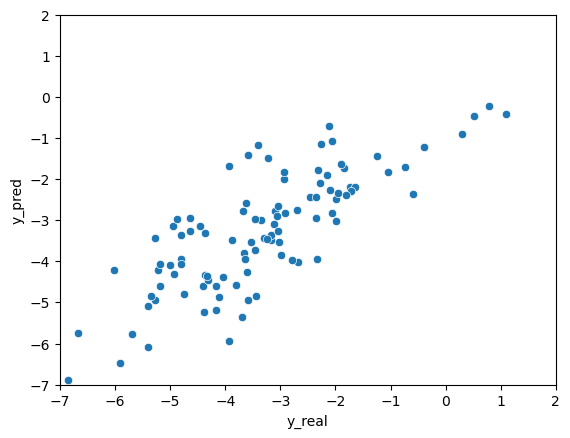

elapsed time: 4.246304988861084
run: 31
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258569AFCD0>, <dgl.data.utils.Subset object at 0x00000258E141C7C0>, <dgl.data.utils.Subset object at 0x00000258E141CA30>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.906235551834106 | Validation Loss 4.945133209228516
Epoch 10 | Train Loss 0.3205282708009084 | Validation Loss 3.6895408630371094
Epoch 20 | Train Loss 0.18682685395081838 | Validation Loss 3.554439425468445
Epoch 30 | Train Loss 0.13940953239798545 | Validation Loss 3.595601439476013
Epoch 40 | Train Loss 0.10774880517274141 | Validation Loss 3.4627270698547363
Epoch 50 | Train Loss 0.13443578543762366 | Validation Loss 3.3675249814987183


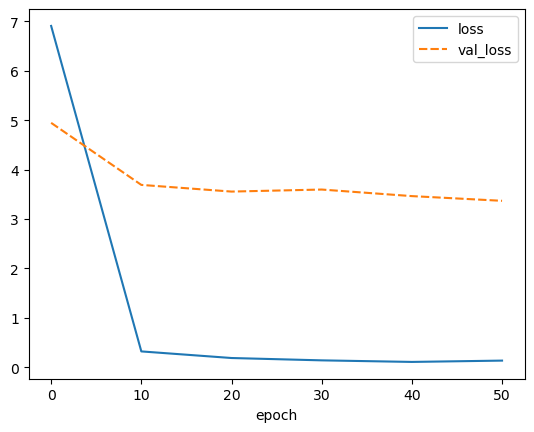

best weights loaded


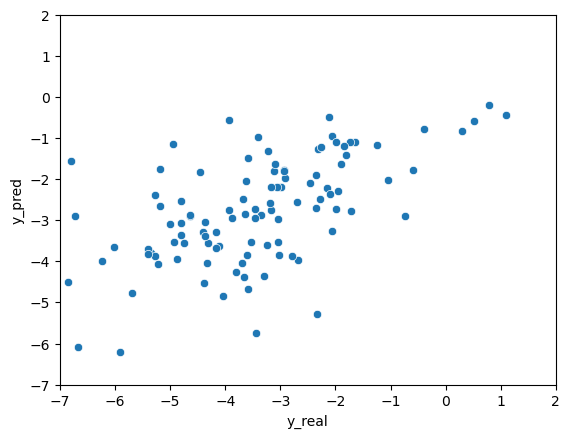

elapsed time: 4.474838972091675
run: 32
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258DB29C3D0>, <dgl.data.utils.Subset object at 0x00000258D87C07C0>, <dgl.data.utils.Subset object at 0x000002580F42C160>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.8089119593302407 | Validation Loss 1.5652301907539368
Epoch 10 | Train Loss 0.06307869404554367 | Validation Loss 1.222766637802124
Epoch 20 | Train Loss 0.020193596246341865 | Validation Loss 1.219504952430725
Epoch 30 | Train Loss 0.05791167461623748 | Validation Loss 1.1492147743701935
Epoch 40 | Train Loss 0.011707400266701976 | Validation Loss 1.1946324706077576
Epoch 50 | Train Loss 0.013146189351876577 | Validation Loss 1.2041034698486328


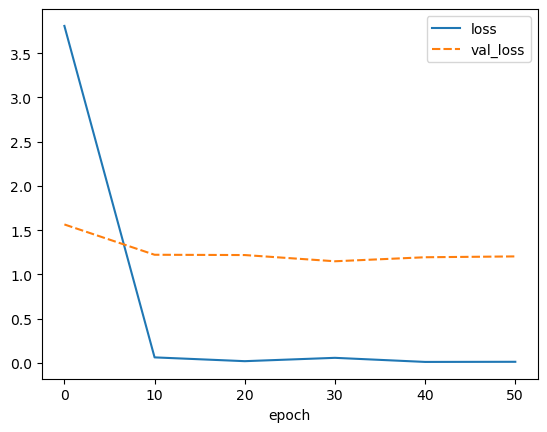

best weights loaded


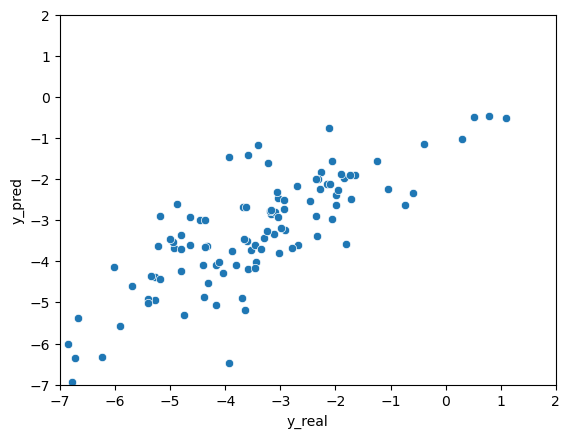

elapsed time: 4.562455415725708
run: 33
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002580F5380A0>, <dgl.data.utils.Subset object at 0x00000258E1399970>, <dgl.data.utils.Subset object at 0x00000258E1399B50>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.759321085611979 | Validation Loss 5.110024333000183
Epoch 10 | Train Loss 0.14794209549824397 | Validation Loss 3.4561127424240112
Epoch 20 | Train Loss 0.060597837219635645 | Validation Loss 3.2913804054260254
Epoch 30 | Train Loss 0.05979294514593979 | Validation Loss 3.4581583738327026
Epoch 40 | Train Loss 0.07524332335839669 | Validation Loss 3.401943802833557
Epoch 50 | Train Loss 0.19842416631678741 | Validation Loss 3.214694619178772


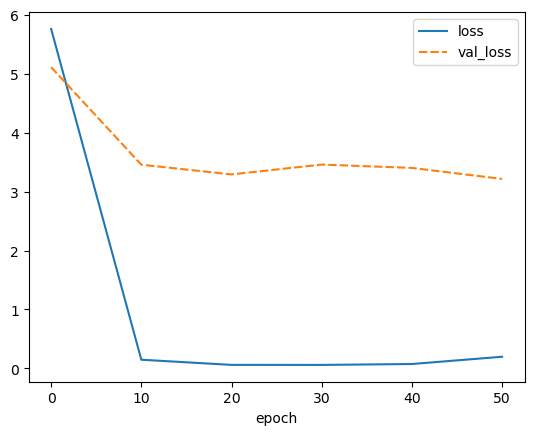

best weights loaded


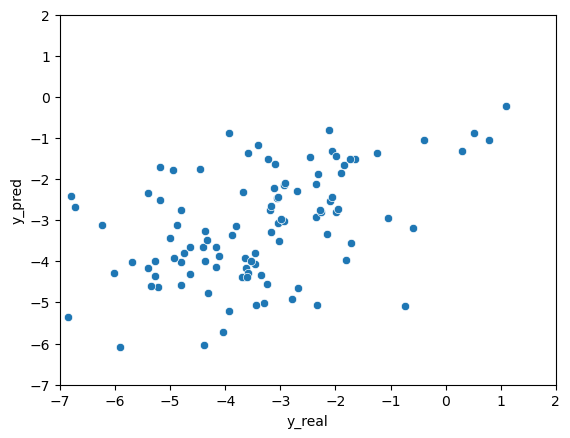

elapsed time: 4.797054767608643
run: 34
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002585693E700>, <dgl.data.utils.Subset object at 0x00000258E6D4DC10>, <dgl.data.utils.Subset object at 0x00000258E6D57520>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.779850800832113 | Validation Loss 1.4411781430244446
Epoch 10 | Train Loss 0.12291135340929031 | Validation Loss 1.2317920923233032
Epoch 20 | Train Loss 0.0312722384929657 | Validation Loss 1.1619651913642883
Epoch 30 | Train Loss 0.04764192290604115 | Validation Loss 1.0941842794418335
Epoch 40 | Train Loss 0.07449203282594681 | Validation Loss 1.218630075454712
Epoch 50 | Train Loss 0.010886982455849648 | Validation Loss 1.1051805019378662


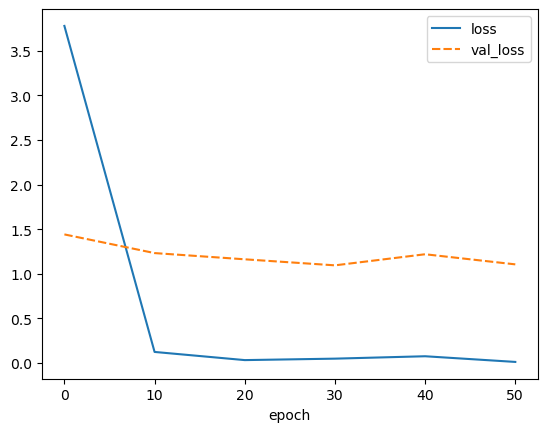

best weights loaded


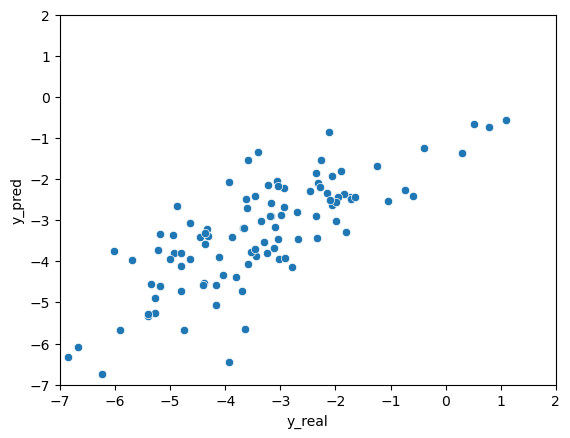

elapsed time: 5.816666126251221
run: 35
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258569F36A0>, <dgl.data.utils.Subset object at 0x00000258E6CE35B0>, <dgl.data.utils.Subset object at 0x00000258E6CE3490>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.638616975148519 | Validation Loss 3.037029981613159
Epoch 10 | Train Loss 0.14733212490876516 | Validation Loss 3.384584069252014
Epoch 20 | Train Loss 0.14193122362097105 | Validation Loss 2.7343002557754517
Epoch 30 | Train Loss 0.1102588767806689 | Validation Loss 3.0795122385025024
Epoch 40 | Train Loss 0.09961560728649298 | Validation Loss 3.44620943069458
Epoch 50 | Train Loss 0.07988143637776375 | Validation Loss 3.120473861694336


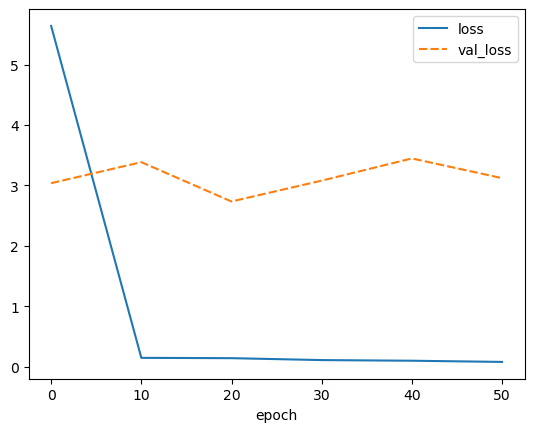

best weights loaded


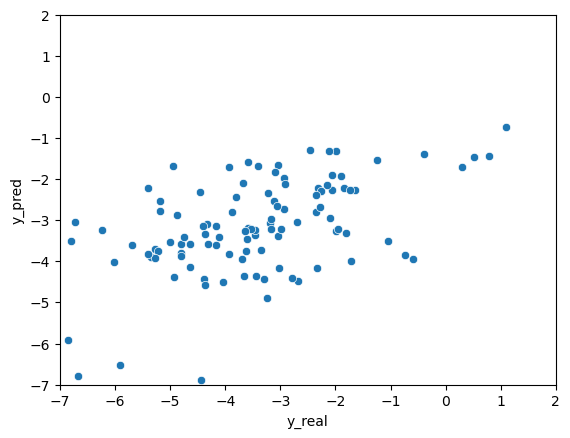

elapsed time: 6.118316888809204
run: 36
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258567702B0>, <dgl.data.utils.Subset object at 0x00000258E6DDD130>, <dgl.data.utils.Subset object at 0x00000258E6DDDE80>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.883576846122742 | Validation Loss 2.4334092140197754
Epoch 10 | Train Loss 0.08204201677193244 | Validation Loss 1.2821288108825684
Epoch 20 | Train Loss 0.026238755773132047 | Validation Loss 1.2753170728683472
Epoch 30 | Train Loss 0.04481786986192068 | Validation Loss 1.2254015803337097
Epoch 40 | Train Loss 0.02344813123345375 | Validation Loss 1.1836569011211395
Epoch 50 | Train Loss 0.01078242330501477 | Validation Loss 1.177347719669342


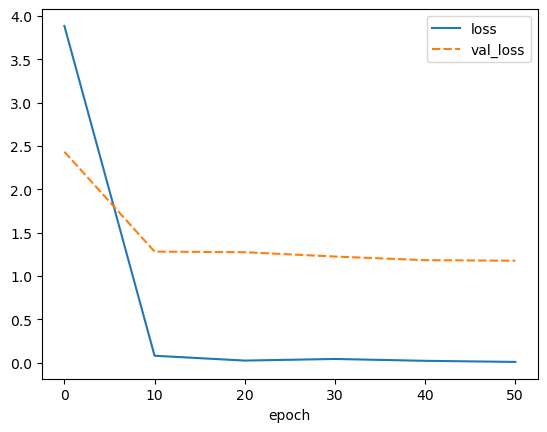

best weights loaded


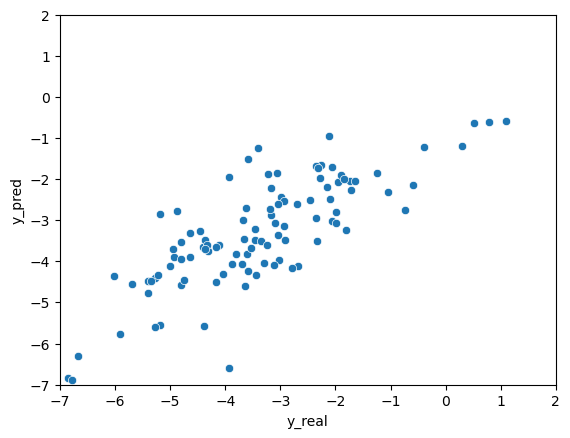

elapsed time: 4.339007139205933
run: 37
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856ACD490>, <dgl.data.utils.Subset object at 0x0000025856A62400>, <dgl.data.utils.Subset object at 0x00000258D87C0190>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.309767158826192 | Validation Loss 4.7144691944122314
Epoch 10 | Train Loss 0.13095352401336033 | Validation Loss 3.267047166824341
Epoch 20 | Train Loss 0.11632190893093745 | Validation Loss 3.3865044116973877
Epoch 30 | Train Loss 0.1037707914908727 | Validation Loss 3.01759672164917
Epoch 40 | Train Loss 0.07242366671562195 | Validation Loss 3.093594193458557
Epoch 50 | Train Loss 0.06778667271137237 | Validation Loss 3.0696494579315186
Epoch 60 | Train Loss 0.06301621732612452 | Validation Loss 3.195950508117676
Epoch 70 | Train Loss 0.06016389544432362 | Validation Loss 3.353686213493347


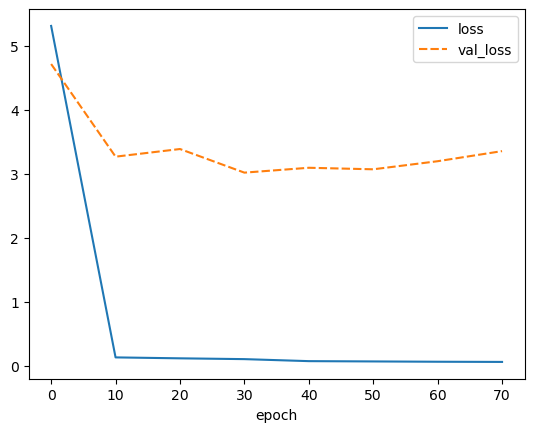

best weights loaded


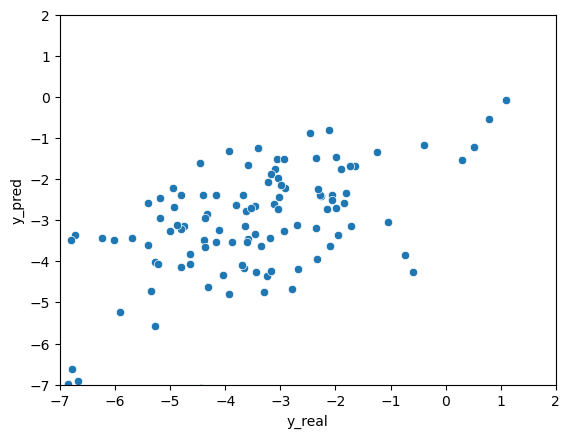

elapsed time: 5.575016260147095
run: 38
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002580F52D730>, <dgl.data.utils.Subset object at 0x00000258E13C33A0>, <dgl.data.utils.Subset object at 0x00000258E13C3A30>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.085246165593465 | Validation Loss 4.213958024978638
Epoch 10 | Train Loss 0.18240899095932642 | Validation Loss 1.3344014883041382
Epoch 20 | Train Loss 0.040254895202815534 | Validation Loss 1.3770852088928223
Epoch 30 | Train Loss 0.03429665973720451 | Validation Loss 1.228395700454712
Epoch 40 | Train Loss 0.011673157676705159 | Validation Loss 1.2758224606513977
Epoch 50 | Train Loss 0.020066070122023424 | Validation Loss 1.2631765007972717


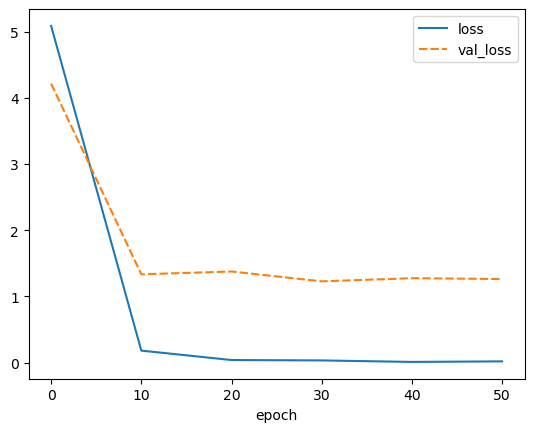

best weights loaded


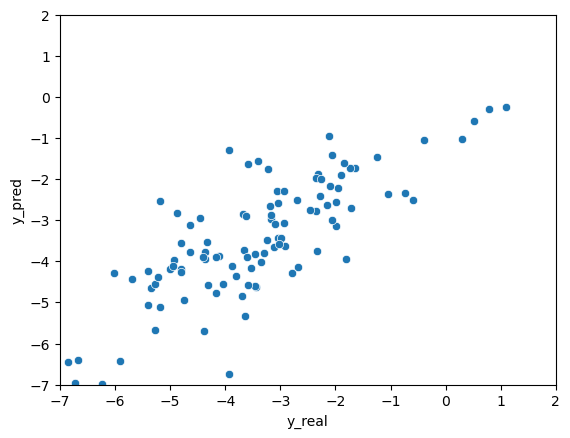

elapsed time: 3.853367805480957
run: 39
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258E1472F10>, <dgl.data.utils.Subset object at 0x00000258E141ADC0>, <dgl.data.utils.Subset object at 0x00000258E141A3A0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.359740447998047 | Validation Loss 7.005707740783691
Epoch 10 | Train Loss 0.26872107287247976 | Validation Loss 3.450846791267395
Epoch 20 | Train Loss 0.06988041456788778 | Validation Loss 3.460941791534424
Epoch 30 | Train Loss 0.07591810425122579 | Validation Loss 3.526705503463745
Epoch 40 | Train Loss 0.054690263637652 | Validation Loss 3.4047653675079346
Epoch 50 | Train Loss 0.050465262623038146 | Validation Loss 3.4970333576202393


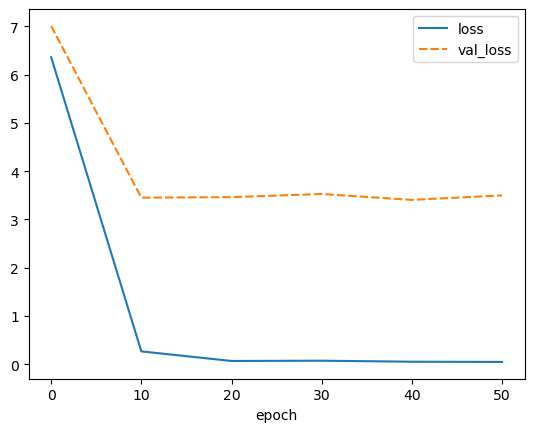

best weights loaded


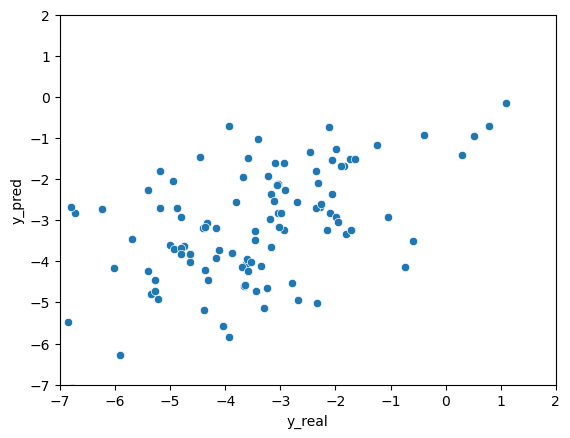

elapsed time: 3.982146978378296
run: 40
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856896AF0>, <dgl.data.utils.Subset object at 0x0000025856D0D940>, <dgl.data.utils.Subset object at 0x00000258D89EF640>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.288934977849324 | Validation Loss 1.3710039258003235
Epoch 10 | Train Loss 0.060280279442667964 | Validation Loss 1.1195042133331299
Epoch 20 | Train Loss 0.029124228035410246 | Validation Loss 1.1389668583869934
Epoch 30 | Train Loss 0.020706779882311822 | Validation Loss 1.1095792055130005
Epoch 40 | Train Loss 0.038759240756432216 | Validation Loss 1.0201920568943024
Epoch 50 | Train Loss 0.013603061158210038 | Validation Loss 1.118116021156311


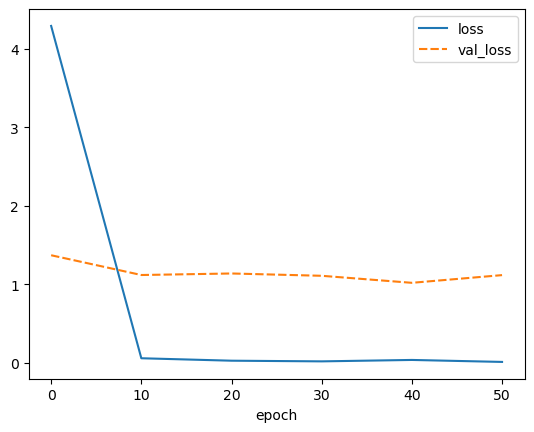

best weights loaded


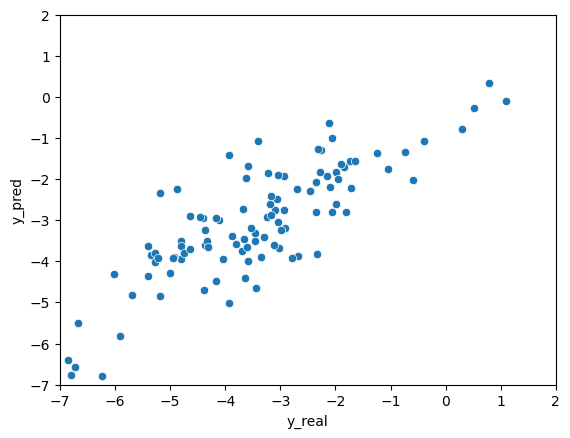

elapsed time: 4.917760372161865
run: 41
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002580D191E80>, <dgl.data.utils.Subset object at 0x00000258E14A7AF0>, <dgl.data.utils.Subset object at 0x00000258E148C1C0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.644474109013875 | Validation Loss 4.697259187698364
Epoch 10 | Train Loss 0.12884202947219212 | Validation Loss 3.4374979734420776
Epoch 20 | Train Loss 0.06894869195918242 | Validation Loss 3.50946843624115
Epoch 30 | Train Loss 0.13079104746381442 | Validation Loss 3.3889496326446533
Epoch 40 | Train Loss 0.06651915709177653 | Validation Loss 3.335604667663574
Epoch 50 | Train Loss 0.06140319624294837 | Validation Loss 3.377487540245056


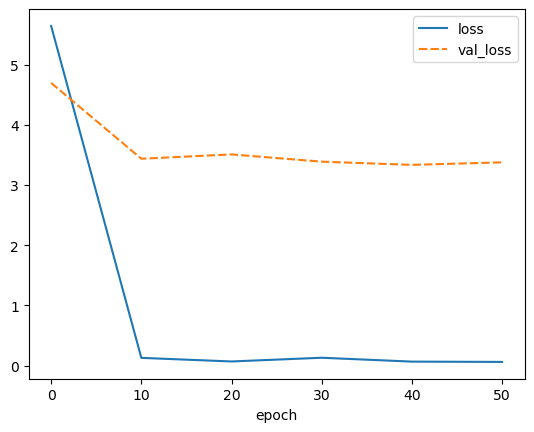

best weights loaded


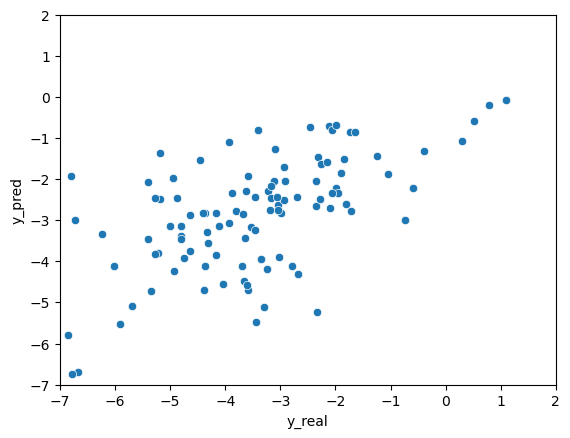

elapsed time: 5.478577613830566
run: 42
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856C6A6D0>, <dgl.data.utils.Subset object at 0x00000258D89CC3A0>, <dgl.data.utils.Subset object at 0x0000025856B44160>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.193780481815338 | Validation Loss 1.79075288772583
Epoch 10 | Train Loss 0.08455574847757816 | Validation Loss 1.0132924914360046
Epoch 20 | Train Loss 0.1102080707748731 | Validation Loss 1.1458459496498108
Epoch 30 | Train Loss 0.013495175819844007 | Validation Loss 1.0505304336547852
Epoch 40 | Train Loss 0.015452731897433599 | Validation Loss 1.1191966533660889
Epoch 50 | Train Loss 0.011456948891282081 | Validation Loss 1.0729427337646484


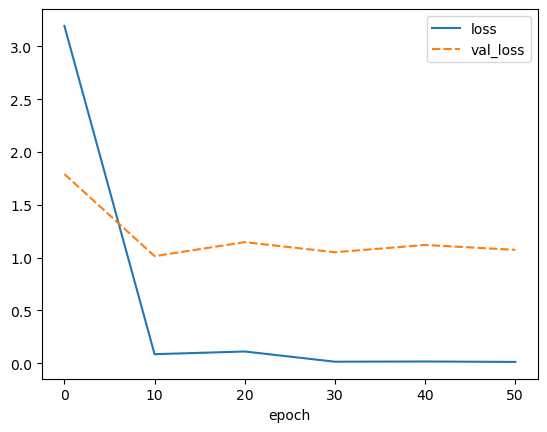

best weights loaded


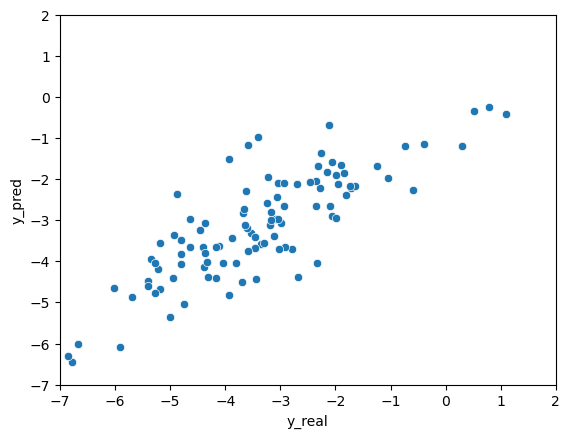

elapsed time: 6.5517425537109375
run: 43
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258D88287C0>, <dgl.data.utils.Subset object at 0x00000258E6D5B310>, <dgl.data.utils.Subset object at 0x00000258E6D5BC70>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.449144649505615 | Validation Loss 4.4992406368255615
Epoch 10 | Train Loss 0.2113141931593418 | Validation Loss 3.2512658834457397
Epoch 20 | Train Loss 0.09541406979163487 | Validation Loss 3.1867923736572266
Epoch 30 | Train Loss 0.11063569833834966 | Validation Loss 4.202432036399841
Epoch 40 | Train Loss 0.14483068858583767 | Validation Loss 2.7995179891586304
Epoch 50 | Train Loss 0.07147423103451729 | Validation Loss 3.1237250566482544
Epoch 60 | Train Loss 0.371068911254406 | Validation Loss 5.209097146987915
Epoch 70 | Train Loss 0.06893129497766495 | Validation Loss 3.366257429122925
Epoch 80 | Train Loss 0.06793431316812833 | Validation Loss 3.5818002223968506


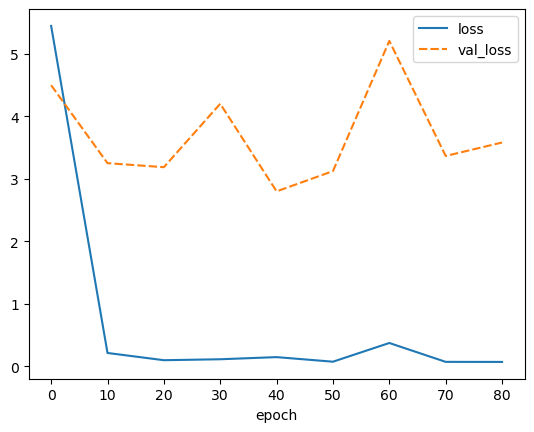

best weights loaded


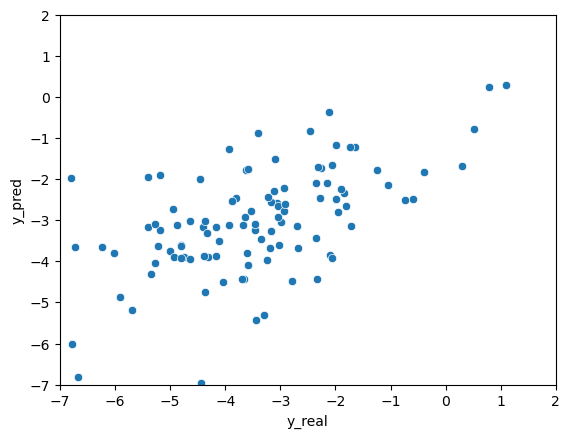

elapsed time: 8.98731780052185
run: 44
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856C047C0>, <dgl.data.utils.Subset object at 0x0000025856D0D280>, <dgl.data.utils.Subset object at 0x0000025856D0DBE0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.7994131485621137 | Validation Loss 2.440152406692505
Epoch 10 | Train Loss 0.11580634551743667 | Validation Loss 1.0347155332565308
Epoch 20 | Train Loss 0.0424365800494949 | Validation Loss 1.126200020313263
Epoch 30 | Train Loss 0.04805343312521775 | Validation Loss 1.1865060925483704
Epoch 40 | Train Loss 0.029347952269017697 | Validation Loss 0.985445499420166
Epoch 50 | Train Loss 0.04256457854062319 | Validation Loss 1.120184600353241


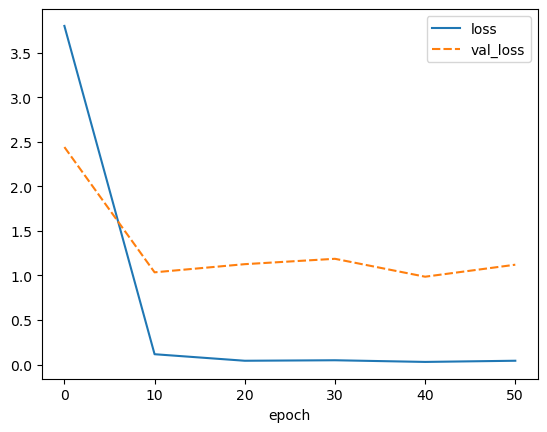

best weights loaded


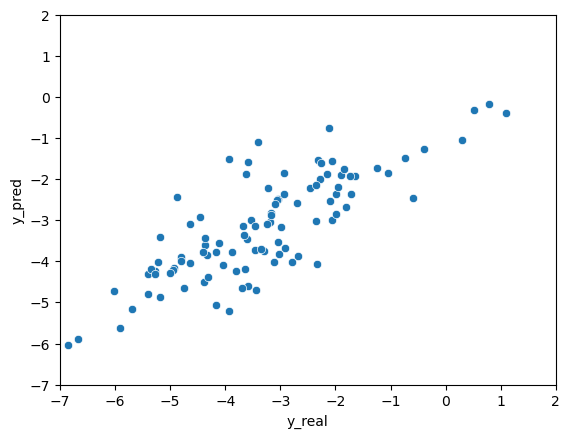

elapsed time: 4.716123104095459
run: 45
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258568F5C70>, <dgl.data.utils.Subset object at 0x00000258E6D44BE0>, <dgl.data.utils.Subset object at 0x00000258E6D602B0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.534470534324646 | Validation Loss 4.955551385879517
Epoch 10 | Train Loss 0.11014507214228313 | Validation Loss 3.0906765460968018
Epoch 20 | Train Loss 0.12469288421173891 | Validation Loss 3.1088756322860718
Epoch 30 | Train Loss 0.07069933122644821 | Validation Loss 3.349083662033081
Epoch 40 | Train Loss 0.09328128332272172 | Validation Loss 3.2305251359939575
Epoch 50 | Train Loss 0.18020204628507297 | Validation Loss 2.6820114850997925


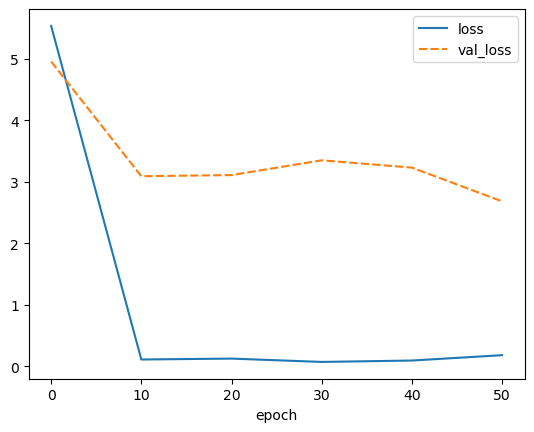

best weights loaded


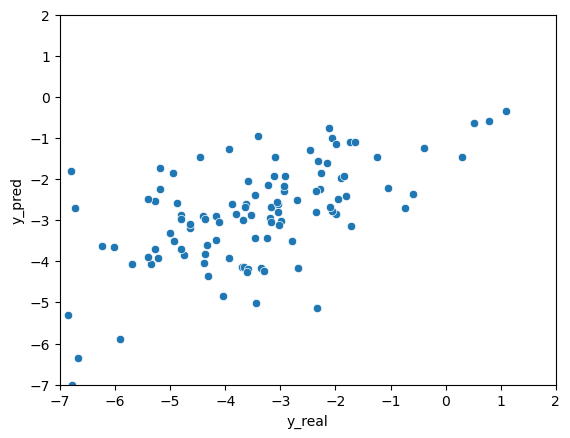

elapsed time: 5.551095962524414
run: 46
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856BBAEB0>, <dgl.data.utils.Subset object at 0x0000025856A42D30>, <dgl.data.utils.Subset object at 0x000002580D14DA60>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.300135008494059 | Validation Loss 3.986038327217102
Epoch 10 | Train Loss 0.08229593386252722 | Validation Loss 1.1767174303531647
Epoch 20 | Train Loss 0.03207461868102352 | Validation Loss 1.1465076208114624
Epoch 30 | Train Loss 0.015521247529735167 | Validation Loss 1.1356358528137207
Epoch 40 | Train Loss 0.008997687239510317 | Validation Loss 1.1163841485977173
Epoch 50 | Train Loss 0.008695043701057633 | Validation Loss 1.1484974026679993


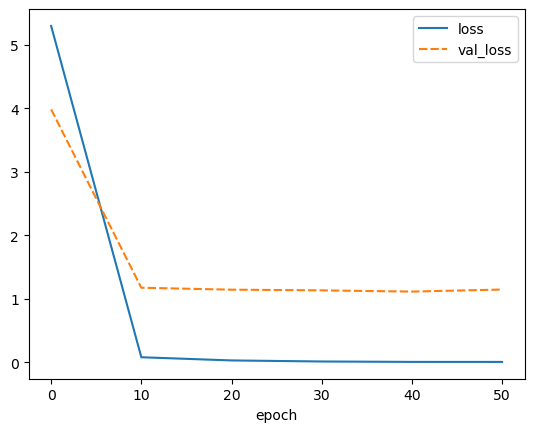

best weights loaded


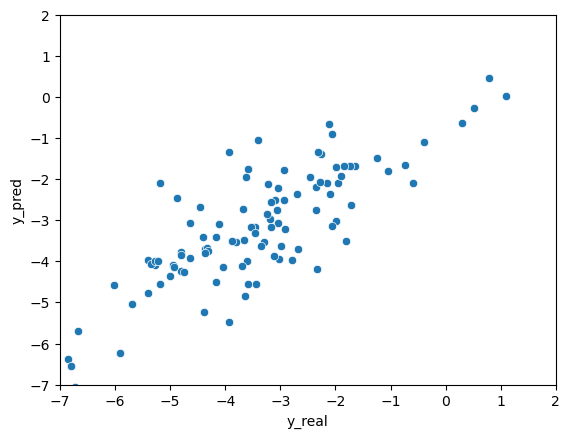

elapsed time: 4.424541711807251
run: 47
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002584DC5ADC0>, <dgl.data.utils.Subset object at 0x0000025856B6FB20>, <dgl.data.utils.Subset object at 0x0000025856B6FD90>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.552263975143433 | Validation Loss 5.523361921310425
Epoch 10 | Train Loss 0.2037160277366638 | Validation Loss 3.4409559965133667
Epoch 20 | Train Loss 0.07727347599963347 | Validation Loss 3.860689163208008
Epoch 30 | Train Loss 0.06973737441003322 | Validation Loss 3.6344157457351685
Epoch 40 | Train Loss 0.09546247025330862 | Validation Loss 3.628692388534546
Epoch 50 | Train Loss 0.05553971518141528 | Validation Loss 3.66693377494812


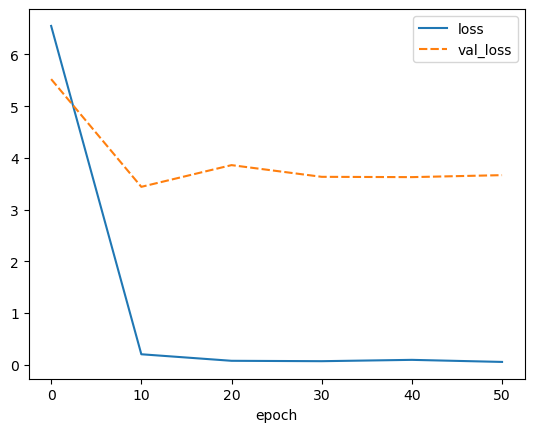

best weights loaded


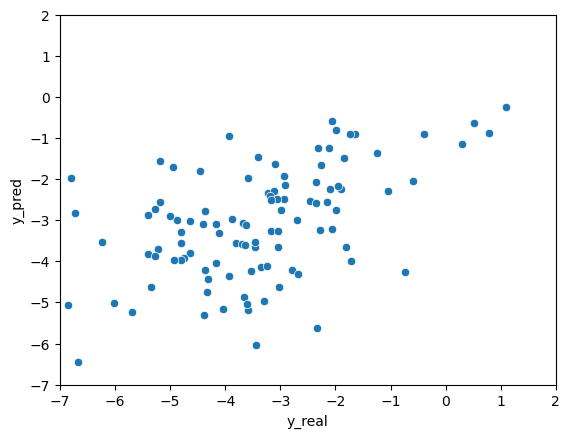

elapsed time: 4.323369979858398
run: 48
{'radius': 4, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856A74190>, <dgl.data.utils.Subset object at 0x00000258E148ED90>, <dgl.data.utils.Subset object at 0x00000258E148EE50>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.904594381650289 | Validation Loss 1.71499365568161
Epoch 10 | Train Loss 0.0586544486383597 | Validation Loss 1.1582728624343872
Epoch 20 | Train Loss 0.02645611480499307 | Validation Loss 1.117547631263733
Epoch 30 | Train Loss 0.03003767830474923 | Validation Loss 1.1679930686950684
Epoch 40 | Train Loss 0.008266626593346397 | Validation Loss 1.138202428817749
Epoch 50 | Train Loss 0.010179648486276468 | Validation Loss 1.0991886258125305
Epoch 60 | Train Loss 0.02283343318849802 | Validation Loss 1.20416921377182
Epoch 70 | Train Loss 0.01282997637366255 | Validation Loss 1.131132185459137


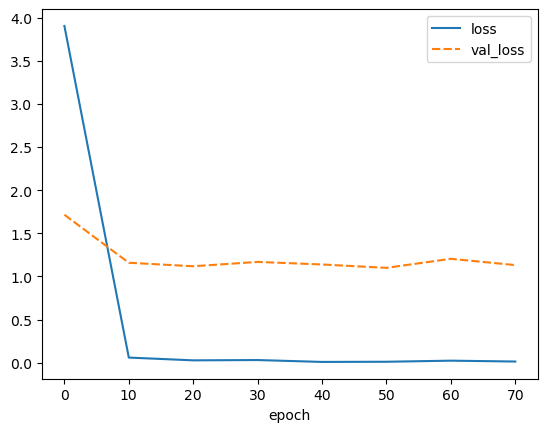

best weights loaded


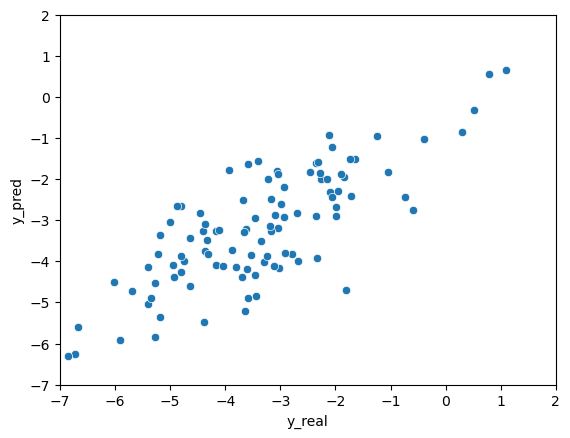

elapsed time: 5.675699949264526
run: 49
{'radius': 4, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258D8911AF0>, <dgl.data.utils.Subset object at 0x00000258DB2E3BB0>, <dgl.data.utils.Subset object at 0x00000258DB2E3BE0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.804493220647176 | Validation Loss 4.90995979309082
Epoch 10 | Train Loss 0.1245223047832648 | Validation Loss 3.062064528465271
Epoch 20 | Train Loss 0.031144069321453572 | Validation Loss 2.951900839805603
Epoch 30 | Train Loss 0.03923669058519105 | Validation Loss 2.899284601211548
Epoch 40 | Train Loss 0.06395736780638496 | Validation Loss 2.8649274110794067
Epoch 50 | Train Loss 0.034314669637630385 | Validation Loss 2.928884983062744
Epoch 60 | Train Loss 0.03351042879124482 | Validation Loss 2.785587430000305
Epoch 70 | Train Loss 0.028220757469534875 | Validation Loss 2.8887137174606323
Epoch 80 | Train Loss 0.02732770351382593 | Validation Loss 2.8387221097946167
Epoch 90 | Train Loss 0.026316771376878025 | Validation Loss 2.8171128034591675
Epoch 100 | Train Loss 0.02876195339486003 | Validation Loss 2.73987352848053
Epoch 110 | Train Loss 0.023837950825691224 | Validation Loss 2.8893383741378784
Epoch 120 | Train Loss 0.046289316813151044 | Validation L

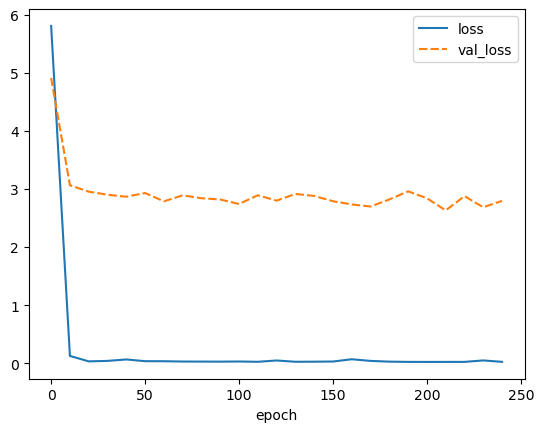

best weights loaded


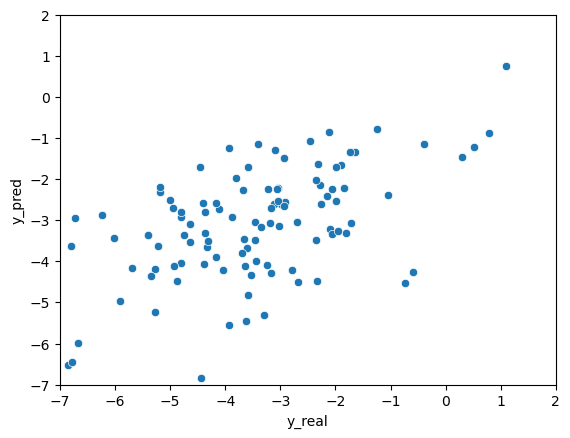

elapsed time: 14.723313093185425
run: 50
{'radius': 4, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002585684B880>, <dgl.data.utils.Subset object at 0x00000258E6DAB9D0>, <dgl.data.utils.Subset object at 0x00000258E6DABBB0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.5114908695220945 | Validation Loss 4.314905166625977
Epoch 10 | Train Loss 0.05619814234475295 | Validation Loss 1.2883487939834595
Epoch 20 | Train Loss 0.3989397684733073 | Validation Loss 1.1359760761260986
Epoch 30 | Train Loss 0.01822542498509089 | Validation Loss 1.1245617866516113
Epoch 40 | Train Loss 0.008367845648899674 | Validation Loss 1.1267577409744263
Epoch 50 | Train Loss 0.007779508704940478 | Validation Loss 1.1578410863876343
Epoch 60 | Train Loss 0.02095237864802281 | Validation Loss 1.123420774936676
Epoch 70 | Train Loss 0.00841693690357109 | Validation Loss 1.1159079670906067


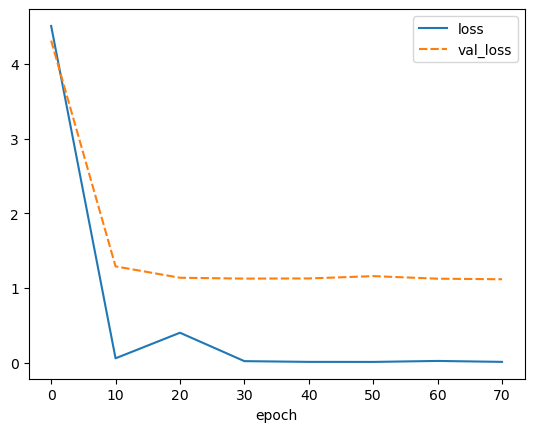

best weights loaded


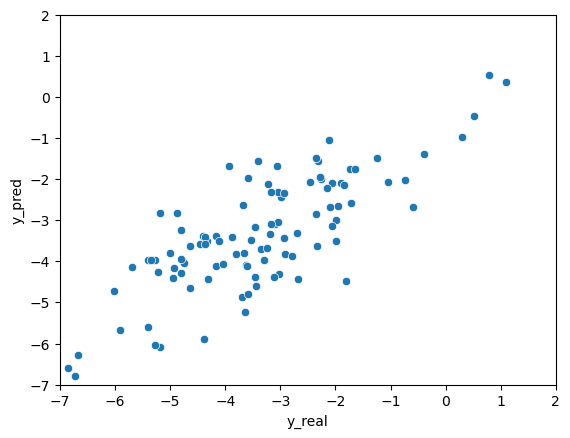

elapsed time: 7.86655068397522
run: 51
{'radius': 4, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002580F558C70>, <dgl.data.utils.Subset object at 0x00000258DB2E3E20>, <dgl.data.utils.Subset object at 0x00000258DB2E36A0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.86995317141215 | Validation Loss 5.137885332107544
Epoch 10 | Train Loss 0.11191370139519373 | Validation Loss 2.8439861536026
Epoch 20 | Train Loss 0.11530876656373341 | Validation Loss 3.4252036809921265
Epoch 30 | Train Loss 0.04492531976041694 | Validation Loss 3.033397674560547
Epoch 40 | Train Loss 0.17925295022626717 | Validation Loss 3.5285199880599976
Epoch 50 | Train Loss 0.027493708394467832 | Validation Loss 2.9199830293655396
Epoch 60 | Train Loss 0.0625255715722839 | Validation Loss 2.869630455970764
Epoch 70 | Train Loss 0.03576750711848339 | Validation Loss 3.1512715816497803
Epoch 80 | Train Loss 0.409360541899999 | Validation Loss 3.1727415323257446


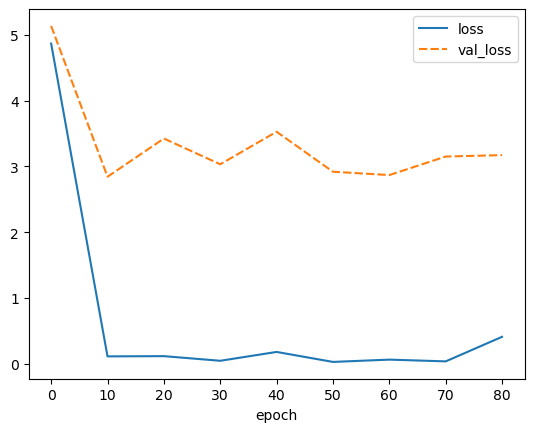

best weights loaded


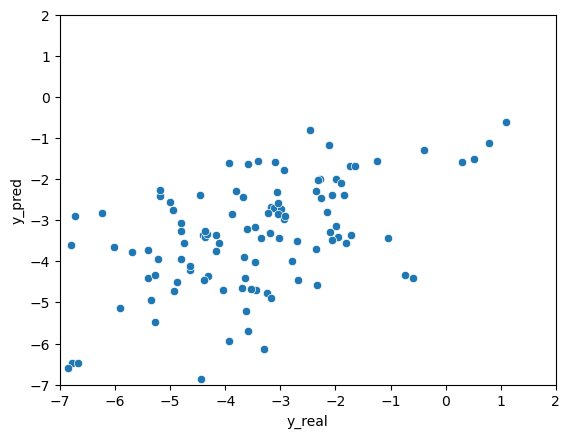

elapsed time: 8.129328966140747
run: 52
{'radius': 4, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856B2A7C0>, <dgl.data.utils.Subset object at 0x00000258E6DAEA90>, <dgl.data.utils.Subset object at 0x00000258E6DAC580>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.750380402803421 | Validation Loss 1.7109758257865906
Epoch 10 | Train Loss 0.07201039716601372 | Validation Loss 1.2985572814941406
Epoch 20 | Train Loss 0.09137354666988055 | Validation Loss 1.0121096670627594
Epoch 30 | Train Loss 0.011909231652195255 | Validation Loss 1.082174837589264
Epoch 40 | Train Loss 0.03668454472596447 | Validation Loss 1.0946579575538635
Epoch 50 | Train Loss 0.014401963942994674 | Validation Loss 1.070710152387619


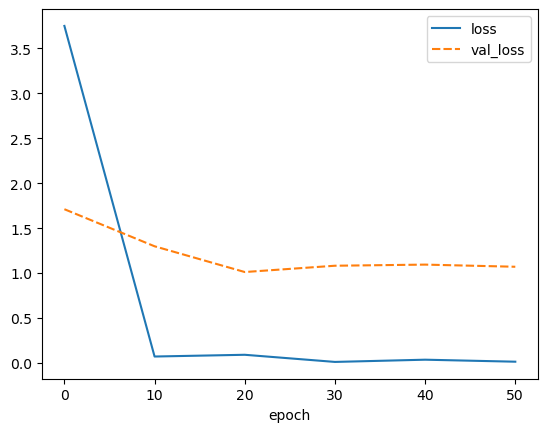

best weights loaded


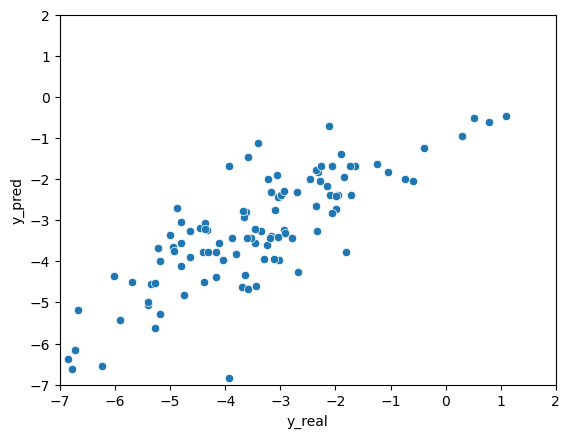

elapsed time: 4.320711612701416
run: 53
{'radius': 4, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025834F06400>, <dgl.data.utils.Subset object at 0x00000258D88C9CA0>, <dgl.data.utils.Subset object at 0x00000258D88C97F0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.262316807111104 | Validation Loss 4.369706153869629
Epoch 10 | Train Loss 0.09928612969815731 | Validation Loss 2.9631179571151733
Epoch 20 | Train Loss 0.04236461464315653 | Validation Loss 3.024937391281128
Epoch 30 | Train Loss 0.08030890785157681 | Validation Loss 2.7246471643447876
Epoch 40 | Train Loss 0.07425163326164087 | Validation Loss 2.8818236589431763
Epoch 50 | Train Loss 0.04183106143027544 | Validation Loss 2.9038689136505127
Epoch 60 | Train Loss 0.027494100481271745 | Validation Loss 2.9084038734436035
Epoch 70 | Train Loss 0.027459216909483074 | Validation Loss 2.8215625286102295
Epoch 80 | Train Loss 0.04502445943653584 | Validation Loss 2.733345150947571
Epoch 90 | Train Loss 0.10124512538313865 | Validation Loss 3.1167521476745605
Epoch 100 | Train Loss 0.024170721974223854 | Validation Loss 3.145145535469055
Epoch 110 | Train Loss 0.06449114208420118 | Validation Loss 3.1639615297317505
Epoch 120 | Train Loss 0.025415324342126646 | Validati

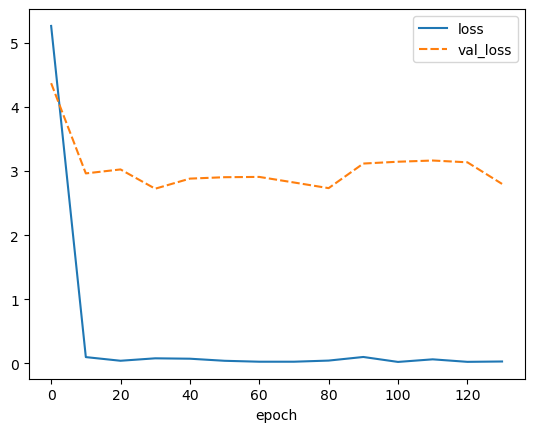

best weights loaded


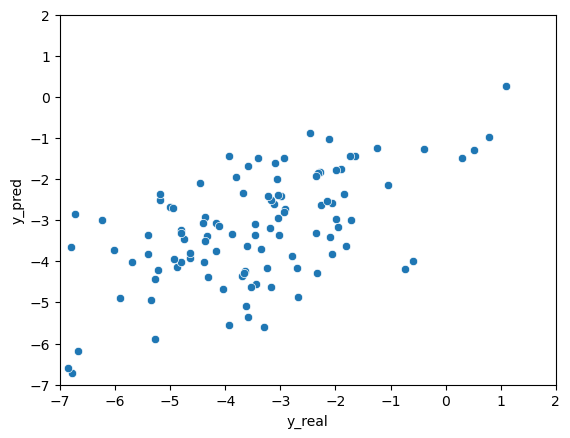

elapsed time: 9.032859086990356
run: 54
{'radius': 4, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258E141D370>, <dgl.data.utils.Subset object at 0x00000258D89BE460>, <dgl.data.utils.Subset object at 0x00000258D89CDA30>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.416686137517293 | Validation Loss 3.215438723564148
Epoch 10 | Train Loss 0.09056926692525545 | Validation Loss 1.1965120136737823
Epoch 20 | Train Loss 0.01953324427207311 | Validation Loss 1.1913073658943176
Epoch 30 | Train Loss 0.013020666455850005 | Validation Loss 1.1677442789077759
Epoch 40 | Train Loss 0.04252838889757792 | Validation Loss 1.1559712588787079
Epoch 50 | Train Loss 0.011681122643252214 | Validation Loss 1.1506978571414948


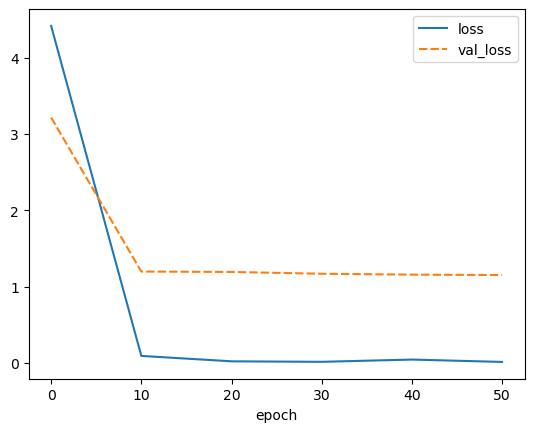

best weights loaded


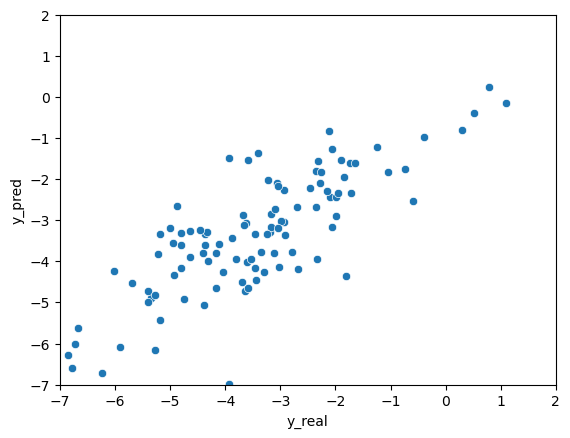

elapsed time: 5.377845048904419
run: 55
{'radius': 4, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258D89FBAC0>, <dgl.data.utils.Subset object at 0x00000258E6DF7430>, <dgl.data.utils.Subset object at 0x00000258E6DD0A00>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.5327194372812905 | Validation Loss 8.13475751876831
Epoch 10 | Train Loss 0.2801507666707039 | Validation Loss 2.9438763856887817
Epoch 20 | Train Loss 0.041333869968851404 | Validation Loss 3.3719303607940674
Epoch 30 | Train Loss 0.03175379205495119 | Validation Loss 3.2063368558883667
Epoch 40 | Train Loss 0.027929497541238864 | Validation Loss 3.3578327894210815
Epoch 50 | Train Loss 0.0252503868813316 | Validation Loss 3.2232649326324463
Epoch 60 | Train Loss 0.03890248580525319 | Validation Loss 3.1647597551345825


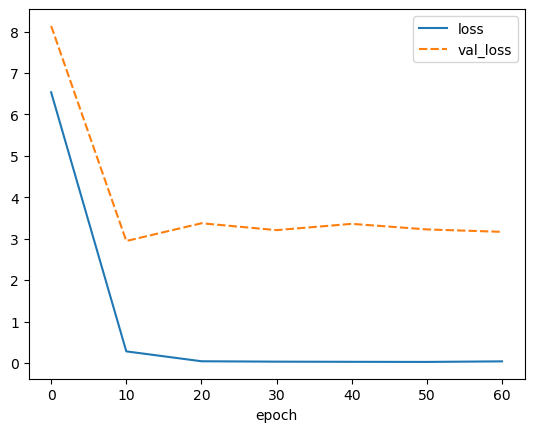

best weights loaded


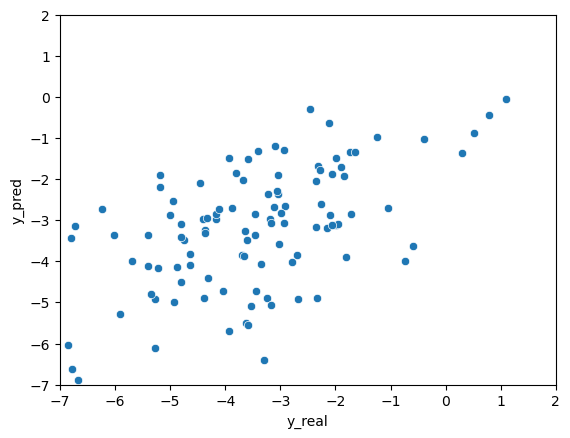

elapsed time: 4.538740158081055
run: 56
{'radius': 4, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002580F598B80>, <dgl.data.utils.Subset object at 0x000002585684B820>, <dgl.data.utils.Subset object at 0x0000025856BCBD90>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.219237979253133 | Validation Loss 1.5163927674293518
Epoch 10 | Train Loss 0.07245115910967191 | Validation Loss 1.1917935013771057
Epoch 20 | Train Loss 0.022211215272545815 | Validation Loss 1.2644275426864624
Epoch 30 | Train Loss 0.020784286657969157 | Validation Loss 1.227286458015442
Epoch 40 | Train Loss 0.02224784220258395 | Validation Loss 1.2575576901435852
Epoch 50 | Train Loss 0.013813999916116397 | Validation Loss 1.1574379801750183


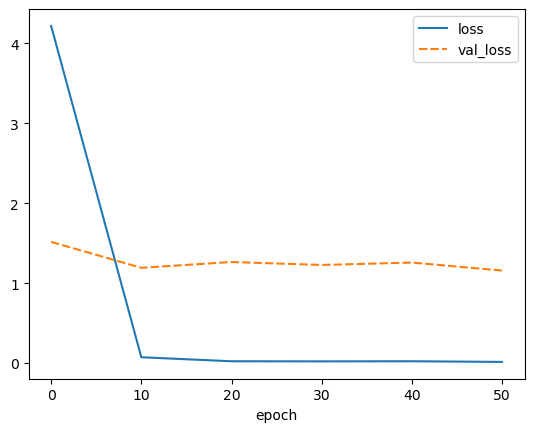

best weights loaded


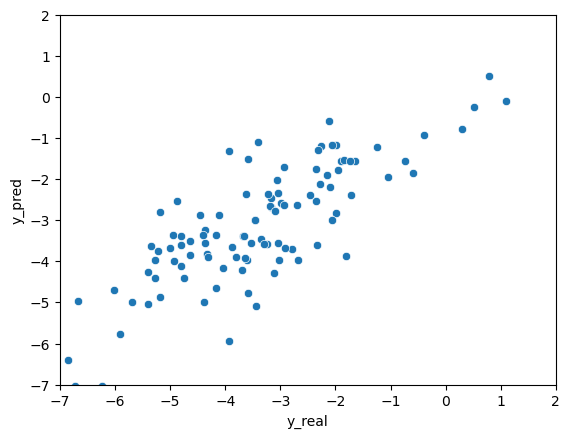

elapsed time: 5.9140753746032715
run: 57
{'radius': 4, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258353E2820>, <dgl.data.utils.Subset object at 0x000002580D19F400>, <dgl.data.utils.Subset object at 0x000002580D19FA90>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.932267951965332 | Validation Loss 4.51417076587677
Epoch 10 | Train Loss 0.09798780928055445 | Validation Loss 3.6123151779174805
Epoch 20 | Train Loss 0.05654399615402023 | Validation Loss 3.7964930534362793
Epoch 30 | Train Loss 0.04231667233010133 | Validation Loss 3.636294364929199
Epoch 40 | Train Loss 0.054888403664032616 | Validation Loss 3.618083953857422
Epoch 50 | Train Loss 0.024878665478900074 | Validation Loss 3.6100765466690063


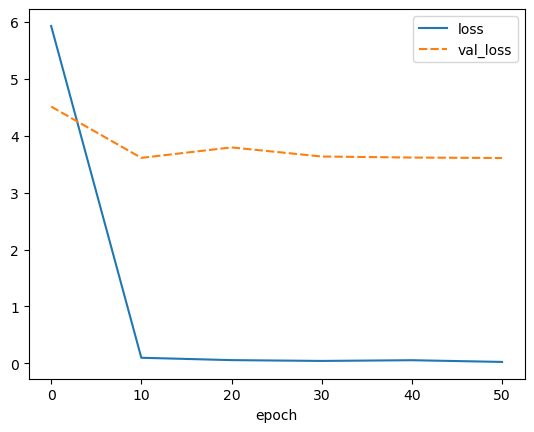

best weights loaded


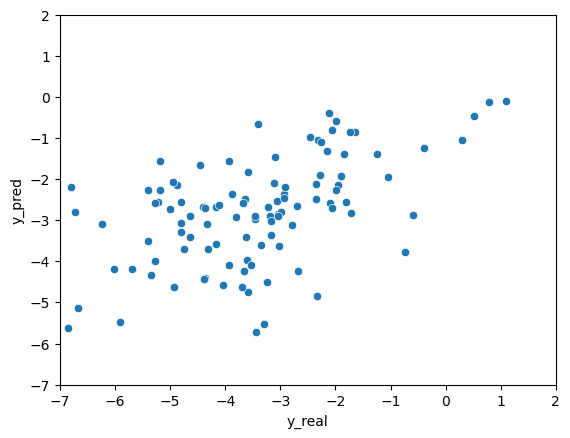

elapsed time: 6.260335206985474
run: 58
{'radius': 4, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856A3F670>, <dgl.data.utils.Subset object at 0x000002580D15B160>, <dgl.data.utils.Subset object at 0x000002585680A430>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.520844586690267 | Validation Loss 1.5497488379478455
Epoch 10 | Train Loss 0.09465581389764945 | Validation Loss 1.3670389652252197
Epoch 20 | Train Loss 0.13319863229990006 | Validation Loss 1.4715803861618042
Epoch 30 | Train Loss 0.022023424118136365 | Validation Loss 1.1770514845848083
Epoch 40 | Train Loss 0.011319089060028395 | Validation Loss 1.1946343183517456
Epoch 50 | Train Loss 0.03839529448499282 | Validation Loss 1.1349966526031494
Epoch 60 | Train Loss 0.016358301478127637 | Validation Loss 1.2159682512283325


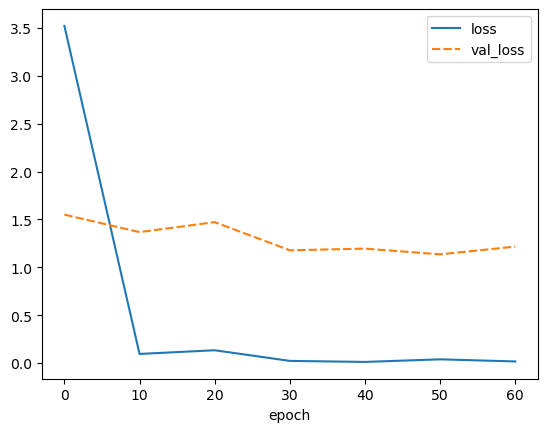

best weights loaded


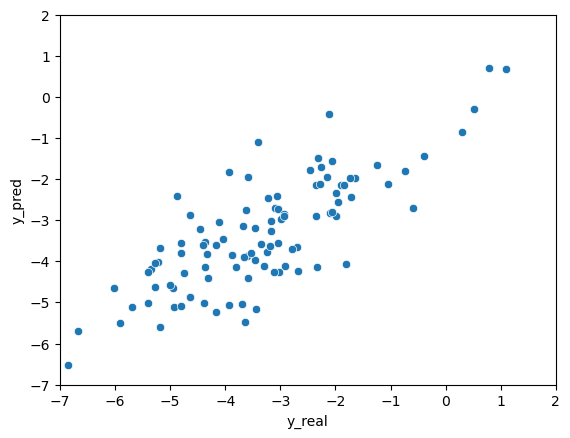

elapsed time: 10.545974731445312
run: 59
{'radius': 4, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258D8941A90>, <dgl.data.utils.Subset object at 0x00000258D8994AC0>, <dgl.data.utils.Subset object at 0x00000258D8994CA0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.826505486170451 | Validation Loss 3.005668044090271
Epoch 10 | Train Loss 0.2570222819844882 | Validation Loss 3.361126184463501
Epoch 20 | Train Loss 0.048771631655593714 | Validation Loss 3.5134953260421753
Epoch 30 | Train Loss 0.05117762585481008 | Validation Loss 3.6388930082321167
Epoch 40 | Train Loss 0.061122965440154074 | Validation Loss 3.596277356147766
Epoch 50 | Train Loss 0.05702372249215841 | Validation Loss 3.238019824028015
Epoch 60 | Train Loss 0.03230964510391156 | Validation Loss 3.4317389726638794
Epoch 70 | Train Loss 0.0507502065350612 | Validation Loss 3.305731177330017
Epoch 80 | Train Loss 0.026905416014293828 | Validation Loss 3.5268373489379883
Epoch 90 | Train Loss 0.3815311630566915 | Validation Loss 3.0548189878463745


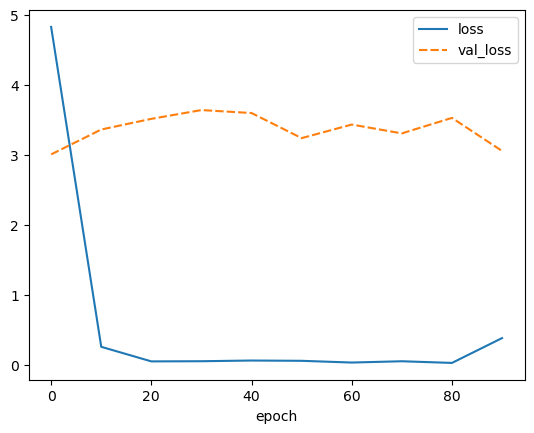

best weights loaded


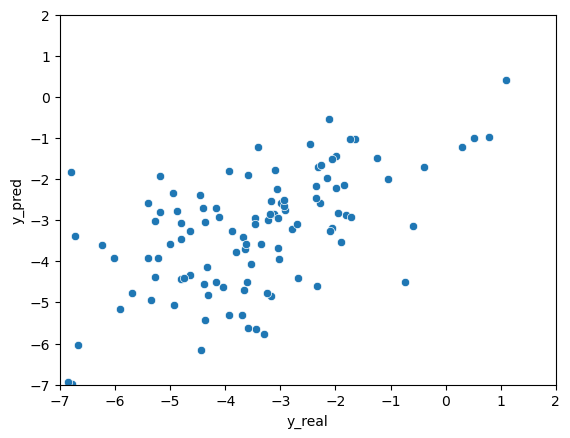

elapsed time: 13.096108198165894
run: 60
{'radius': 4, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258D89B0340>, <dgl.data.utils.Subset object at 0x000002585694BD00>, <dgl.data.utils.Subset object at 0x000002585694B880>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.378936306635539 | Validation Loss 2.547756314277649
Epoch 10 | Train Loss 0.06408903387685617 | Validation Loss 1.1958972811698914
Epoch 20 | Train Loss 0.029668587011595568 | Validation Loss 1.1457814574241638
Epoch 30 | Train Loss 0.02131830168267091 | Validation Loss 1.1632311344146729
Epoch 40 | Train Loss 0.012025727874909837 | Validation Loss 1.2226605415344238
Epoch 50 | Train Loss 0.02145723986128966 | Validation Loss 1.4209778904914856


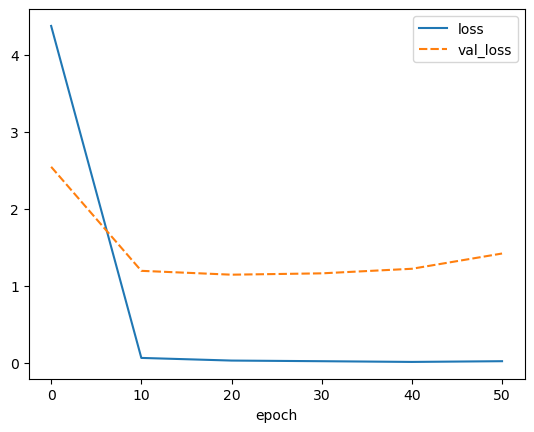

best weights loaded


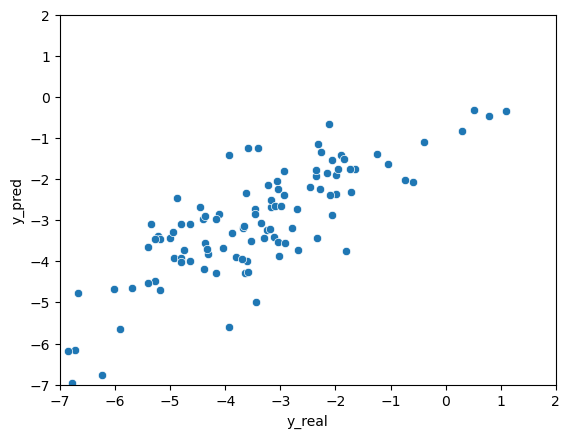

elapsed time: 8.098810195922852
run: 61
{'radius': 4, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000258D88C44C0>, <dgl.data.utils.Subset object at 0x0000025856BBA370>, <dgl.data.utils.Subset object at 0x00000258D8894DC0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.294179224967957 | Validation Loss 4.808260679244995
Epoch 10 | Train Loss 0.0835710688183705 | Validation Loss 3.5284106731414795
Epoch 20 | Train Loss 0.08113130331039428 | Validation Loss 3.6527971029281616
Epoch 30 | Train Loss 0.044239981845021245 | Validation Loss 3.461914300918579
Epoch 40 | Train Loss 0.041156418373187384 | Validation Loss 3.172219157218933
Epoch 50 | Train Loss 0.038174617352585 | Validation Loss 3.472351551055908
Epoch 60 | Train Loss 0.04542851420119405 | Validation Loss 3.097909927368164
Epoch 70 | Train Loss 0.04523701481521129 | Validation Loss 3.5302751064300537
Epoch 80 | Train Loss 0.03606363373498122 | Validation Loss 3.40289568901062
Epoch 90 | Train Loss 0.03851185366511345 | Validation Loss 3.161419987678528
Epoch 100 | Train Loss 0.025021033920347692 | Validation Loss 3.4342007637023926
Epoch 110 | Train Loss 0.023424616657818358 | Validation Loss 3.332217812538147
Epoch 120 | Train Loss 0.09373241141438485 | Validation Loss 

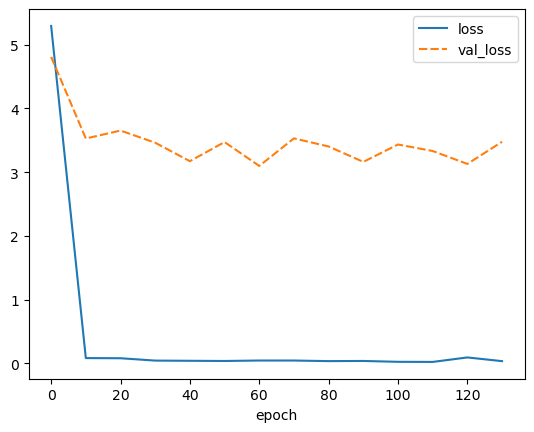

best weights loaded


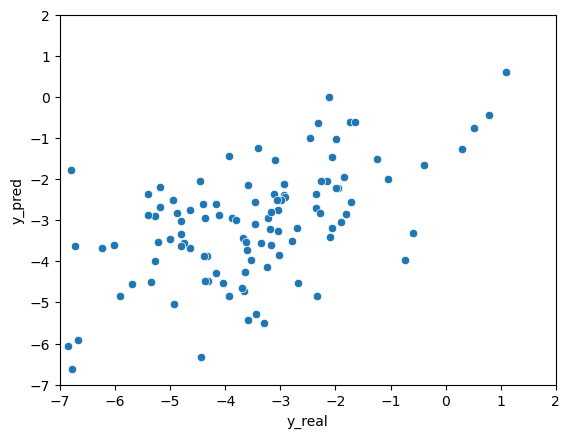

elapsed time: 13.201232671737671
run: 62
{'radius': 4, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002580F515190>, <dgl.data.utils.Subset object at 0x00000258567696A0>, <dgl.data.utils.Subset object at 0x0000025856769F70>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.503812170028686 | Validation Loss 2.5176265239715576
Epoch 10 | Train Loss 0.0717495876053969 | Validation Loss 1.3186621069908142
Epoch 20 | Train Loss 0.020154518913477658 | Validation Loss 1.3487634062767029
Epoch 30 | Train Loss 0.021360638551414013 | Validation Loss 1.3768541514873505
Epoch 40 | Train Loss 0.011234343579659859 | Validation Loss 1.261631190776825
Epoch 50 | Train Loss 0.014169753047948081 | Validation Loss 1.2811334729194641


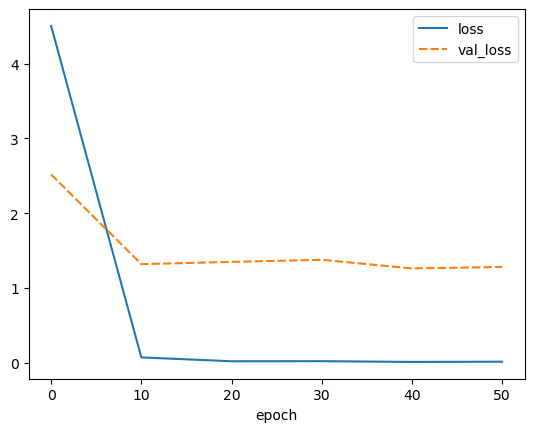

best weights loaded


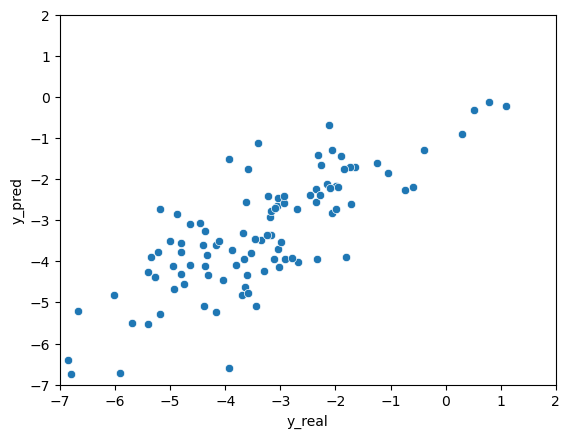

elapsed time: 6.293023586273193
run: 63
{'radius': 4, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000025856A46DC0>, <dgl.data.utils.Subset object at 0x00000258567CC130>, <dgl.data.utils.Subset object at 0x0000025856C582B0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.281208197275798 | Validation Loss 5.725462913513184
Epoch 10 | Train Loss 0.1318577508131663 | Validation Loss 3.46810519695282
Epoch 20 | Train Loss 0.08291068660716215 | Validation Loss 3.5849874019622803
Epoch 30 | Train Loss 0.03421865360190471 | Validation Loss 3.6600643396377563
Epoch 40 | Train Loss 0.031098856683820487 | Validation Loss 3.426393508911133
Epoch 50 | Train Loss 0.026717450500776372 | Validation Loss 3.4270710945129395


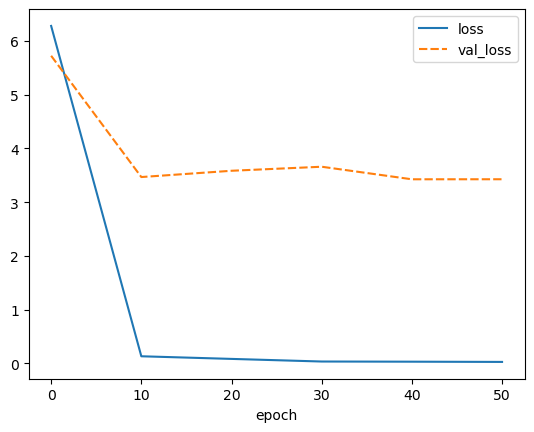

best weights loaded


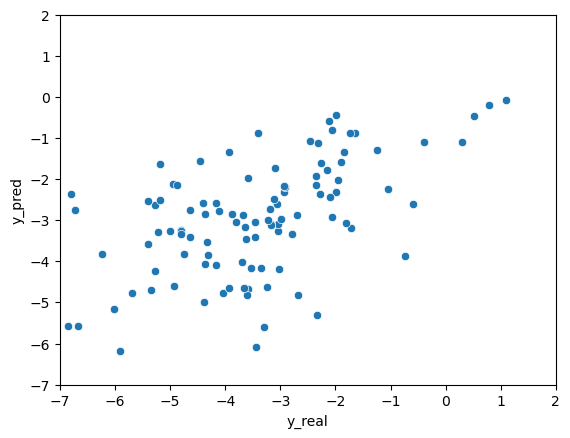

elapsed time: 6.305643796920776


In [13]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()

    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_esol()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_reg_esol.pkl'
        else: 
            loader_file = 'datasets_reg_esol.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(morgan_data_val, 
                                    batch_size=batch_size, shuffle=True)

        else:
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)

        mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)


    plt.show()
    
    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
        
    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    